In [50]:
import json
import pandas as pd

# Load JSON
with open("result.json") as f:
    data = json.load(f)

# Convert dict of dicts into a DataFrame
records = []
for id_, details in data.items():
    flat = {'ID': id_}
    flat.update(details)
    records.append(flat)

df = pd.DataFrame(records)
df

,ID,Dashboard,Position,Name,Email,LIS,EQ,Critical Skills,Critical Skills Scores,Necessary Skills,Necessary Skills Scores,Beneficial Skills,Beneficial Skills Scores,Key skills mean,Necessary skills mean,beneficial skills mean
0,LDP0394,D12: Corporate Communications and Training,CORPORATE CULTURE & TRAINING MANAGER,Donald Finchum,d.finchum31@anondomain.com,90.5050,131,"[Communication Skills, Training & Onboarding, ...","[96, 90, 98, 97]","[Organization Skills, Measuring & Evaluating R...","[98, 100, 89, 86, 88]","[Social Insight, Supportiveness, Charisma, Emo...","[100, 97, 100, 96, 83]",95.25,92.20,95.2
1,LDP4315,D4: Logistics and Site Management,SITE MANAGER - CIVIL,Susan Clark,s.clark59@anondomain.com,73.3140,107,"[Problem-Solving, Project Management, Organiza...","[90, 93, 81, 68, 68]","[Monitoring Employee Performance, Measuring & ...","[78, 60, 83, 87]","[Negotiating Ability, Resilience/Hardiness, In...","[85, 62, 69, 39, 53]",80.00,77.00,61.6
2,LDP0127,D6: Procurement and Supply Chain Management,PROCUREMENT MANAGER-OFFICE SUPPLY,John Mendoza,j.mendoza41@anondomain.com,76.2050,110,"[Problem-Solving, Project Management, Informat...","[80, 93, 86, 68, 63]","[Conflict Management, Change Management, Commu...","[79, 80, 72, 95]","[Innovative Mindset, Resilience/Hardiness, Sup...","[84, 68, 100, 64, 89]",78.00,81.50,81.0
3,LDP4802,D5: Engineering and Technical Management,COMMISSIONING MANAGER,Juan Spegal,j.spegal48@anondomain.com,75.4210,109,"[Problem-Solving, Project Management, Communic...","[100, 93, 82, 67, 64]","[Information Gathering & Analysis, Measuring &...","[64, 76, 77, 81]","[Innovative Mindset, Negotiating Ability, Resi...","[93, 66, 86, 75, 92]",81.20,74.50,82.4
4,LDP1313,D13: Administrative and Support Services,SUPPORT SERVICES MANAGER,Ruth Kingsley,r.kingsley18@anondomain.com,81.1940,114,"[Organization Skills, Problem-Solving, Communi...","[93, 100, 88, 77]","[Project Management, Customer Orientation, Con...","[91, 93, 70, 69, 75]","[Supportiveness, Patience, Negotiating Ability...","[90, 76, 91, 100, 89]",89.50,79.60,89.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,LDP3000,D3: Senior Management - Operations and Logistics,PROJECT MANAGER-CIVIL,Deborah Woll,d.woll16@anondomain.com,57.0325,67,"[Problem-Solving, Project Management, Communic...","[50, 68, 60, 80, 97]","[Information Gathering & Analysis, Measuring &...","[56, 54, 59, 64]","[Organization Skills, Negotiating Ability, Res...","[68, 69, 46, 74, 93]",71.00,58.25,70.0
77,LDP3019,D3: Senior Management - Operations and Logistics,PROJECT MANAGER-INDUSTRIAL,Robert Shirk,r.shirk38@anondomain.com,76.5470,105,"[Problem-Solving, Project Management, Communic...","[70, 98, 86, 83, 73]","[Information Gathering & Analysis, Measuring &...","[94, 56, 83, 93]","[Organization Skills, Negotiating Ability, Res...","[90, 90, 76, 84, 84]",82.00,81.50,84.8
78,LDP4011,D4: Logistics and Site Management,SITE MANAGER-ELECTRICAL,Monique Gomez,m.gomez13@anondomain.com,85.6640,119,"[Problem-Solving, Project Management, Organiza...","[94, 95, 100, 72, 92]","[Monitoring Employee Performance, Measuring & ...","[100, 100, 86, 86]","[Negotiating Ability, Resilience/Hardiness, In...","[83, 86, 94, 90, 100]",90.60,93.00,90.6
79,LDP5422,D5: Engineering and Technical Management,CONSTRUCTION MANAGER-MEP,Michael Trowell,m.trowell14@anondomain.com,80.4350,114,"[Problem-Solving, Project Management, Communic...","[100, 96, 96, 73, 71]","[Information Gathering & Analysis, Measuring &...","[96, 76, 71, 83]","[Innovative Mindset, Negotiating Ability, Resi...","[85, 66, 100, 76, 93]",87.20,81.50,84.0


In [17]:
from langchain_experimental.agents import create_pandas_dataframe_agent
from langchain_google_genai import ChatGoogleGenerativeAI

# LLM
llm = ChatGoogleGenerativeAI(model="gemini-1.5-pro-latest")

# Create agent with code execution allowed
agent = create_pandas_dataframe_agent(
    llm,
    df,
    verbose=True,
    allow_dangerous_code=True  
)

# Run your query
agent.run("Who got the lowest EQ?")




> Entering new AgentExecutor chain...
Thought: I need to find the minimum value in the 'EQ' column and the corresponding name.
Action: python_repl_ast
Action Input: 
```python
print(df.loc[df['EQ'] == df['EQ'].min()][['Name', 'EQ']])
```             Name  EQ
76  Deborah  Woll  67
Deborah Woll got the lowest EQ.

Final Answer: Deborah Woll got the lowest EQ.

> Finished chain.


'Deborah Woll got the lowest EQ.'

In [49]:
from langchain_experimental.agents import create_pandas_dataframe_agent
from langchain_google_genai import ChatGoogleGenerativeAI

class LeadershipAnalyticsAgent:
    def __init__(self, df, verbose=True):
        self.llm = ChatGoogleGenerativeAI(model="gemini-1.5-pro-latest")
        self.agent = create_pandas_dataframe_agent(
            self.llm,
            df,
            verbose=verbose,
            allow_dangerous_code=True
        )

    def ask(self, query: str) -> str:
        prompt = (
            "You are a data analytics assistant. You work with structured leadership performance data. "
            "Use Python and Pandas to perform accurate numeric comparisons and filtering. "
            "Avoid guessing. Always return the actual value found in the data.\n\n"
            f"Question: {query}"
        )
        return self.agent.run(prompt)


In [51]:
# Assuming df is already loaded and prepped
agent = LeadershipAnalyticsAgent(df)

# Example questions
#print(agent.ask("Who got the lowest EQ?"))
#print(agent.ask("Which dashboard has the highest average LIS?"))
print(agent.ask("List the top 3 performers in Key skills mean."))




> Entering new AgentExecutor chain...
Thought: I need to sort the dataframe by 'Key skills mean' in descending order and then get the top 3 rows.

Action: python_repl_ast
Action Input:
```python
print(df.sort_values('Key skills mean', ascending=False).head(3))
```         ID                                         Dashboard  \
61  LDP1111  D11: Corporate Strategy and Business Development   
11  LDP8111                  D8: Health, Safety, and Security   
17  LDP1001                   D10: Financial and Risk Control   

                                             Position              Name  \
61  DIRECTOR - BUSINESS DEVELOPMENT & STRATEGIC PA...  William  Smullen   
11                            SR. IT SECURITY MANAGER   Laticia  Bridge   
17                           ACCOUNTS PAYABLE MANAGER      James  Lobur   

                         Email     LIS   EQ  \
61  w.smullen81@anondomain.com  92.615  129   
11   l.bridge31@anondomain.com  86.511  117   
17    j.lobur69@anondomain.com 

In [13]:
retriever = vectorstore.as_retriever(search_kwargs={"k": 20})


In [14]:
from langchain.chains import StuffDocumentsChain
from langchain.chains.combine_documents.stuff import StuffDocumentsChain as CombineStuffDocumentsChain

# 🧠 Custom prompt
context_prompt = PromptTemplate.from_template("""
You are a data assistant helping analyze leadership assessment data.

Use the provided context to answer the question below. The context includes information on individuals, dashboards, and their skills.

Context:
{context}

Question:
{question}

Answer by combining insights across individuals. Focus on patterns, averages, and summaries. If no useful context is found, say "Not enough information."
""")

# 🔗 Chain
llm_chain = LLMChain(llm=llm, prompt=context_prompt)

stuff_chain = CombineStuffDocumentsChain(
    llm_chain=llm_chain,
    document_variable_name="context"
)

# 🧠 Updated RAG with context + memory
rag_chain = RetrievalQA(
    retriever=retriever,
    combine_documents_chain=stuff_chain,
    memory=memory
)

# -----------------------------
# Pandas Agent Setup
# -----------------------------
pandas_agent = create_pandas_dataframe_agent(
    llm=llm,
    df=df,
    verbose=True,
    allow_dangerous_code=True
)

# -----------------------------
# Classifier to Route Query
# -----------------------------
classifier_prompt = PromptTemplate.from_template("""
You are a smart classifier. Given a user question, decide if it should be handled using:

- "structured" → if it's about rankings, filters, math, comparisons, scores
- "semantic" → if it's about summaries, meaning, types of skills, descriptions

Return ONLY the word "structured" or "semantic".

Question: {query}
""")

classifier_chain = LLMChain(llm=llm, prompt=classifier_prompt)

# -----------------------------
# Unified Ask Function
# -----------------------------
def ask(query: str) -> str:
    route = classifier_chain.run({"query": query}).strip().lower()
    print(f"[Routing → {route}]")
    
    if route == "structured":
        return pandas_agent.run(query)
    elif route == "semantic":
        return rag_chain.run(query)
    else:
        return "Sorry, I couldn't confidently classify your question."

In [64]:
import json
import pandas as pd
from langchain_core.documents import Document
from langchain_community.vectorstores import Chroma
from langchain_google_genai import GoogleGenerativeAIEmbeddings, ChatGoogleGenerativeAI
from langchain.chains import RetrievalQA, LLMChain
from langchain_experimental.agents import create_pandas_dataframe_agent
from langchain.prompts import PromptTemplate
from langchain.memory import ConversationBufferMemory


# -----------------------------
# Load & Prepare JSON Data
# -----------------------------
with open("result.json", "r") as f:
    data = json.load(f)

# Convert JSON to flat DataFrame
records = []
docs = []

for id_, entry in data.items():
    flat = {"ID": id_}
    flat.update(entry)
    records.append(flat)

    # For RAG docs
    text = f"ID: {id_}\n"
    for k, v in entry.items():
        if isinstance(v, list):
            text += f"{k}: {', '.join(map(str, v))}\n"
        else:
            text += f"{k}: {v}\n"
    docs.append(Document(page_content=text))

df = pd.DataFrame(records)

# -----------------------------
# LLM & Embeddings
# -----------------------------
llm = ChatGoogleGenerativeAI(model='gemini-1.5-flash')
embedding = GoogleGenerativeAIEmbeddings(model="models/embedding-001")

# -----------------------------
# RAG Setup
# -----------------------------

text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=50,  # Adjust based on model limits
    chunk_overlap=10  # Slight overlap for context continuity
)
split_docs = text_splitter.split_documents(docs)
memory = ConversationBufferMemory(memory_key="chat_history", return_messages=True)

vectorstore = Chroma.from_documents(split_docs, embedding, collection_name="ldp_docs")
retriever = vectorstore.as_retriever(search_kwargs={"k": 20})


from langchain.chains import StuffDocumentsChain
from langchain.chains.combine_documents.stuff import StuffDocumentsChain as CombineStuffDocumentsChain




# 🧠 Custom prompt
context_prompt = PromptTemplate.from_template("""
You are a data assistant helping analyze leadership assessment data.

Use the provided context to answer the question below. The context includes information on individuals, dashboards, and their skills.

Context:
{context}

Question:
{question}

Answer by combining insights across individuals. Focus on patterns, averages, and summaries. If no useful context is found, say "Not enough information."
""")

# 🔗 Chain
llm_chain = LLMChain(llm=llm, prompt=context_prompt)

stuff_chain = CombineStuffDocumentsChain(
    llm_chain=llm_chain,
    document_variable_name="context"
)

# 🧠 Updated RAG with context + memory
rag_chain = RetrievalQA(
    retriever=retriever,
    combine_documents_chain=stuff_chain,
    memory=memory
)

# -----------------------------
# Pandas Agent Setup
# -----------------------------
pandas_agent = create_pandas_dataframe_agent(
    llm=llm,
    df=df,
    verbose=True,
    allow_dangerous_code=True
)

# -----------------------------
# Classifier to Route Query
# -----------------------------
classifier_prompt = PromptTemplate.from_template("""
You are a smart classifier. Given a user question, decide if it should be handled using:

- "structured" → if it's about rankings, filters, math, comparisons, scores
- "semantic" → if it's about summaries, meaning, types of skills, descriptions

Return ONLY the word "structured" or "semantic".

Question: {query}
""")

classifier_chain = LLMChain(llm=llm, prompt=classifier_prompt)

# -----------------------------
# Unified Ask Function
# -----------------------------
def ask(query: str) -> str:
    route = classifier_chain.run({"query": query}).strip().lower()
    print(f"[Routing → {route}]")
    
    if route == "structured":
        return pandas_agent.run(query)
    elif route == "semantic":
        return rag_chain.run(query)
    else:
        return "Sorry, I couldn't confidently classify your question."



In [66]:
from IPython.display import Markdown

Markdown(ask("Which dashboard has the highest average LIS?"))


[Routing → structured]


> Entering new AgentExecutor chain...
Thought: I need to group the dataframe by 'Dashboard' and calculate the mean of the 'LIS' column for each group. Then, I need to find the dashboard with the maximum mean LIS.

Action: python_repl_ast
Action Input: 
```python
import pandas as pd
data = {'ID': ['LDP0394', 'LDP4315', 'LDP0127', 'LDP4802', 'LDP1313'], 
        'Dashboard': ['D12: Corporate Communications and Training', 'D4: Logistics and Site Management', 'D6: Procurement and Supply Chain Management', 'D5: Engineering and Technical Management', 'D13: Administrative and Support Services'], 
        'Position': ['CORPORATE CULTURE & TRAINING MANAGER', 'SITE MANAGER - CIVIL', 'PROCUREMENT MANAGER-OFFICE SUPPLY', 'COMMISSIONING MANAGER', 'SUPPORT SERVICES MANAGER'], 
        'Name': ['Donald  Finchum', 'Susan  Clark', 'John  Mendoza', 'Juan  Spegal', 'Ruth  Kingsley'], 
        'Email': ['d.finchum31@anondomain.com', 's.clark59@anondomain.com', 'j.mendoza41@anondom

D12: Corporate Communications and Training

In [67]:
mean_lis_by_dashboard = df.groupby('Dashboard')['LIS'].mean()
mean_lis_by_dashboard

Dashboard
D10: Financial and Risk Control                     80.650000
D11: Corporate Strategy and Business Development    86.844667
D12: Corporate Communications and Training          77.053800
D13: Administrative and Support Services            80.076000
D2: Executive Level Operations                      85.887500
D3: Senior Management - Operations and Logistics    75.324042
D4: Logistics and Site Management                   79.168694
D5: Engineering and Technical Management            76.401190
D6: Procurement and Supply Chain Management         77.378800
D7: Corporate Quality Assurance and Control         77.845500
D8: Health, Safety, and Security                    76.752000
D9: Corporate Governance and Compliance             66.360500
Name: LIS, dtype: float64

In [68]:
dashboard_with_highest_mean_lis = mean_lis_by_dashboard.idxmax()
dashboard_with_highest_mean_lis

'D11: Corporate Strategy and Business Development'

In [42]:
from IPython.display import Markdown

query = "What are the most common skills in D4?"
docs = retriever.get_relevant_documents(query)

# View retrieved context
for i, doc in enumerate(docs):
    print(f"\n--- Document {i+1} ---\n")
    print(doc.page_content)

# Then call the chain
Markdown(ask(query))


/var/folders/6v/qvykl7vd2yb8gqx3qb10rc5m0000gn/T/ipykernel_51521/2070393591.py:4: LangChainDeprecationWarning: The method `BaseRetriever.get_relevant_documents` was deprecated in langchain-core 0.1.46 and will be removed in 1.0. Use :meth:`~invoke` instead.
  docs = retriever.get_relevant_documents(query)



--- Document 1 ---

ID: LDP4242
Dashboard: D4: Logistics and Site Management
Position: SITE MANAGER - CIVIL
Name: Katherine  Duggan
Email: k.duggan30@anondomain.com
LIS: 76.657
EQ: 108
Critical Skills: Problem-Solving, Project Management, Organization Skills, Accountability, Communication Skills
Critical Skills Scores: 90, 84, 79, 87, 92
Necessary Skills: Monitoring Employee Performance, Measuring & Evaluating Results, Conflict Management, Building Effective Teams
Necessary Skills Scores: 97, 59, 66, 76
Beneficial Skills: Negotiating Ability, Resilience/Hardiness, Innovative Mindset, Recruitment & Hiring, Supportiveness
Beneficial Skills Scores: 83, 72, 73, 73, 93
Key skills mean: 86.4
Necessary skills mean: 74.5
beneficial skills mean: 78.8


--- Document 2 ---

ID: LDP4242
Dashboard: D4: Logistics and Site Management
Position: SITE MANAGER - CIVIL
Name: Katherine  Duggan
Email: k.duggan30@anondomain.com
LIS: 76.657
EQ: 108
Critical Skills: Problem-Solving, Project Management, Organi

In Dashboard D4 (Logistics and Site Management), the most common skills across the two Site Managers (Civil and Mechanical) are:

* **Critical Skills:** Problem-Solving, Project Management, Organization Skills, Accountability, Communication Skills
* **Necessary Skills:** Monitoring Employee Performance, Measuring & Evaluating Results, Conflict Management, Building Effective Teams
* **Beneficial Skills:** Negotiating Ability, Resilience/Hardiness, Innovative Mindset, Recruitment & Hiring, Supportiveness

In [19]:
def get_insights_chart(lis_data, source_code, llm):
    insights_template = PromptTemplate(
        input_variables=["Dataframe", "PlotCode"],
        template="""You are a data analyst helping decision-makers understand data trends.

    Step 1: Analyze the PlotCode and DataFrame to understand what the chart is visualizing. Do NOT include or describe the code itself.

    Step 2: Return your output in **Markdown** using the following structure:

    **Chart Description**
    \n
    A brief paragraph that explains what the chart is visualizing and why it's relevant.

    **Chart Insights**
    - Use concise bullet points to highlight key patterns, trends, or outliers in the data.
    - Make the language natural and insightful, not robotic.

    **Chart Actionables**
    - Suggest meaningful next steps or considerations based on the data.
    - Actionables should feel strategic and helpful to someone using the chart to make decisions.

    Important Guidelines:
    - If a KPI, variable, or concept is not clearly defined in the DataFrame or PlotCode, do NOT guess its meaning. It may represent proprietary or internal data.
    - Never fabricate interpretations — only base your insights on what is explicitly observable from the data and plot logic.
    - Be clear, thoughtful, and avoid assumptions.

    Only return the final Markdown-formatted insight (no explanations, no code).

    DataFrame:
    {Dataframe}

    PlotCode:
    {PlotCode}
    """
    )

    #llm = ChatGoogleGenerativeAI(model="gemini-2.0-flash")
    chain = insights_template | llm | StrOutputParser()
    response = chain.invoke({"Dataframe": lis_data, "PlotCode": source_code})
    return response



def build_donut_chart(lis_data):
    ''' 
    LIS Stands for Leadership Index Score which is a weighted score of critical skills necessary skills and beneficial skills to have a standardised metric to compare all individuals
    EQ assesses Emotional Intelligence which is one of the most important skills that all leaders are assessed in.
    '''
    mean_lis = np.mean(lis_data)
    std_lis = np.std(lis_data)
    std_low = mean_lis - 1.5 * std_lis
    std_high = mean_lis + 1.5 * std_lis

    leaders_meeting = np.sum((lis_data >= std_low) & (lis_data <= std_high))
    leaders_exceeding = np.sum(lis_data > std_high)
    leaders_requiring_training = np.sum(lis_data < std_low)

    labels = ['Meeting Minimum Competency', 'Exceeding Expectations', 'Requiring Training']
    values = [leaders_meeting, leaders_exceeding, leaders_requiring_training]
    colors = ['#5c9acc', '#f4a300', '#e63946']

    fig = go.Figure(data=[go.Pie(
        labels=labels,
        values=values,
        hole=0.4,
        marker=dict(colors=colors),
        hovertemplate="%{label}: %{value} leaders (%{percent})",
        textinfo='percent+label'
    )])
    fig.update_layout(
        title="Overall Leadership Competency Levels",
        margin=dict(t=50, b=50, l=50, r=50),
        width=700,
        height=500
    )
    return fig

In [6]:
import pandas as pd

df=pd.read_csv('../resources_summary.csv')
df

,User ID,# Dashboard,Leader,Position,Skill,Skill Category,Score,Resource Type,Resource Text,Link,Image URL
0,LDP0056,D3,EL Chami Hassan,PROJECT MANAGER-INDUSTRIAL,Project Management,Critical,84.0,Book,1. The Goal: A Process of Ongoing Improvement ...,https://www.amazon.com/Goal-Process-Ongoing-Im...,https://m.media-amazon.com/images/I/81xqKkowOn...
1,LDP0056,D3,EL Chami Hassan,PROJECT MANAGER-INDUSTRIAL,Project Management,Critical,84.0,Book,2. Drive by Daniel Pink,https://www.amazon.es/Drive-Daniel-H-Pink/dp/1...,https://m.media-amazon.com/images/I/71uTHTyxtw...
2,LDP0056,D3,EL Chami Hassan,PROJECT MANAGER-INDUSTRIAL,Project Management,Critical,84.0,Book,3. Execution: The Discipline of Getting Things...,https://www.amazon.es/Execution-Discipline-Get...,https://images-eu.ssl-images-amazon.com/images...
3,LDP0056,D3,EL Chami Hassan,PROJECT MANAGER-INDUSTRIAL,Project Management,Critical,84.0,Course,Advanced Project Management on Coursera,https://www.coursera.org/learn/ibm-project-man...,NaN
4,LDP0056,D3,EL Chami Hassan,PROJECT MANAGER-INDUSTRIAL,Project Management,Critical,84.0,Course,Mastering Project Management on LinkedIn Learning,https://www.linkedin.com/learning/mastering-pr...,NaN
...,...,...,...,...,...,...,...,...,...,...,...
4601,LDP9999,D9,Alabdullah Qassem,GOVERNMENT RELATION MANAGER,Negotiating Ability,Necessary,69.0,Education Talk,TEDx: Negotiation Techniques by Ruchi Sinha,https://www.youtube.com/watch?v=Z3HJCQJ2Lmo,NaN
4602,LDP9999,D9,Alabdullah Qassem,GOVERNMENT RELATION MANAGER,Negotiating Ability,Necessary,69.0,Action Step,Use the “interest-based” negotiation approach ...,NaN,NaN
4603,LDP9999,D9,Alabdullah Qassem,GOVERNMENT RELATION MANAGER,Negotiating Ability,Necessary,69.0,Action Step,Attend negotiation workshops and practice with...,NaN,NaN
4604,LDP9999,D9,Alabdullah Qassem,GOVERNMENT RELATION MANAGER,Negotiating Ability,Necessary,69.0,Action Step,Refine emotional regulation techniques to stay...,NaN,NaN


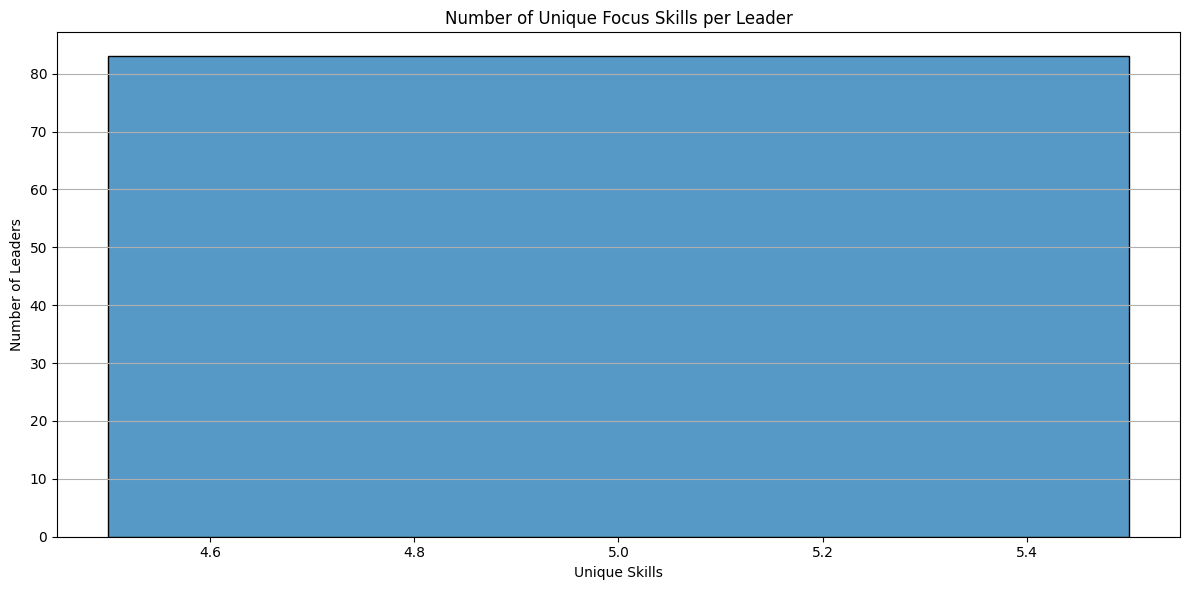

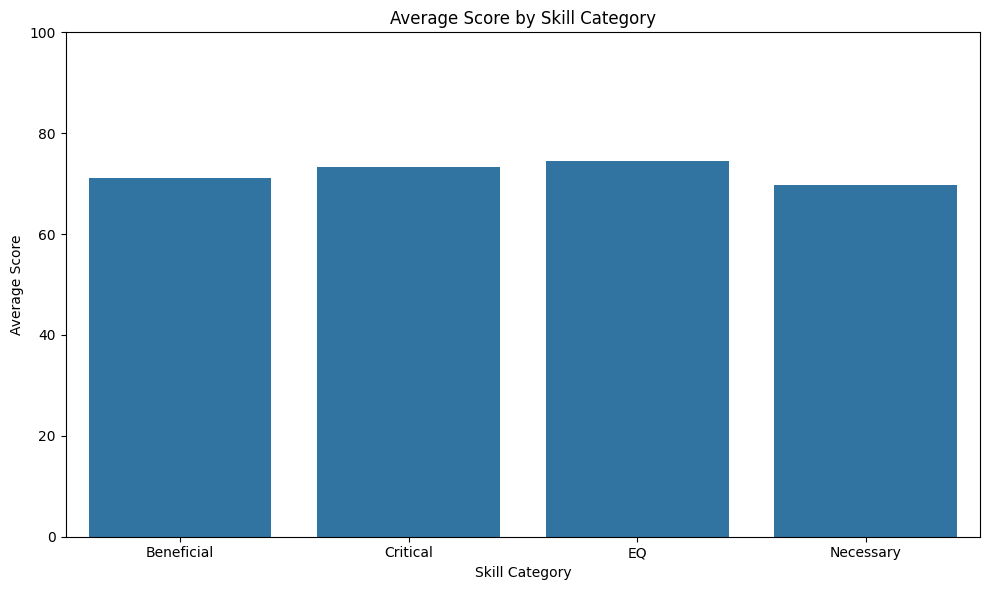

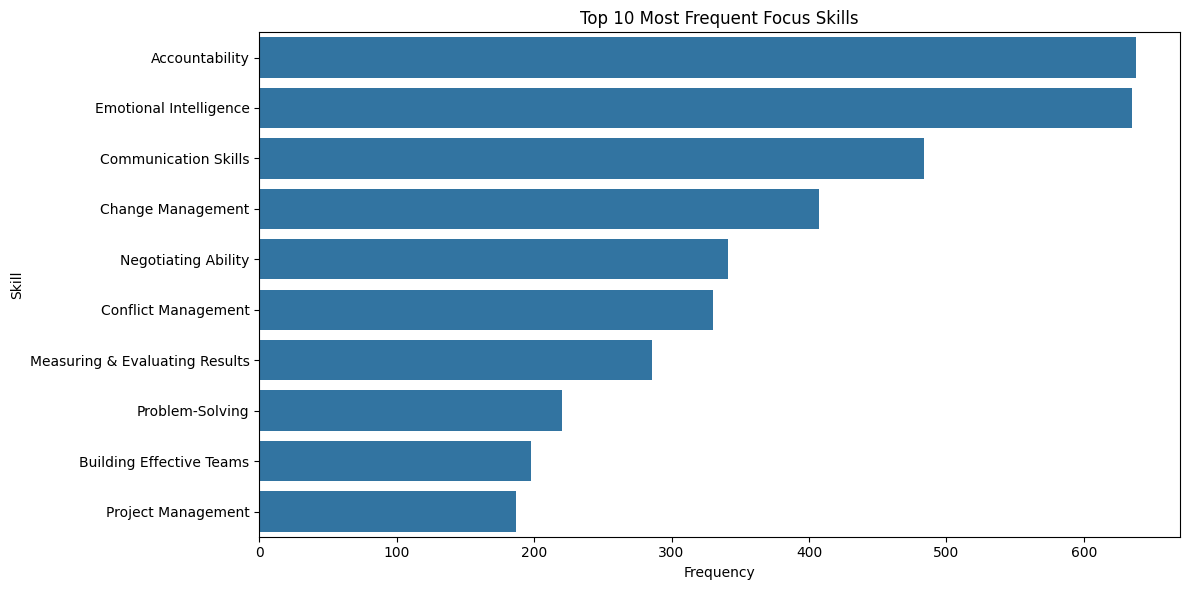

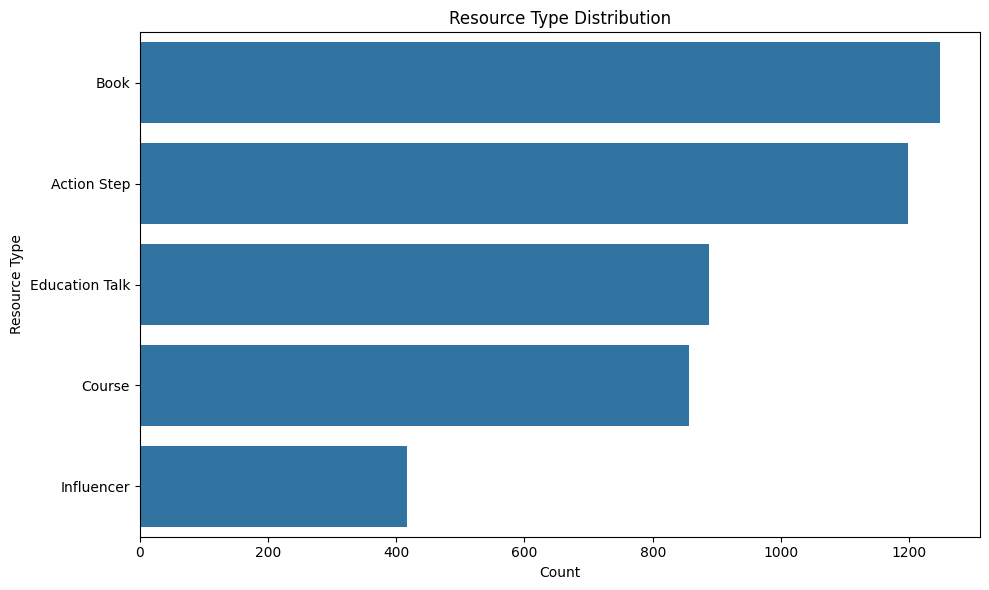

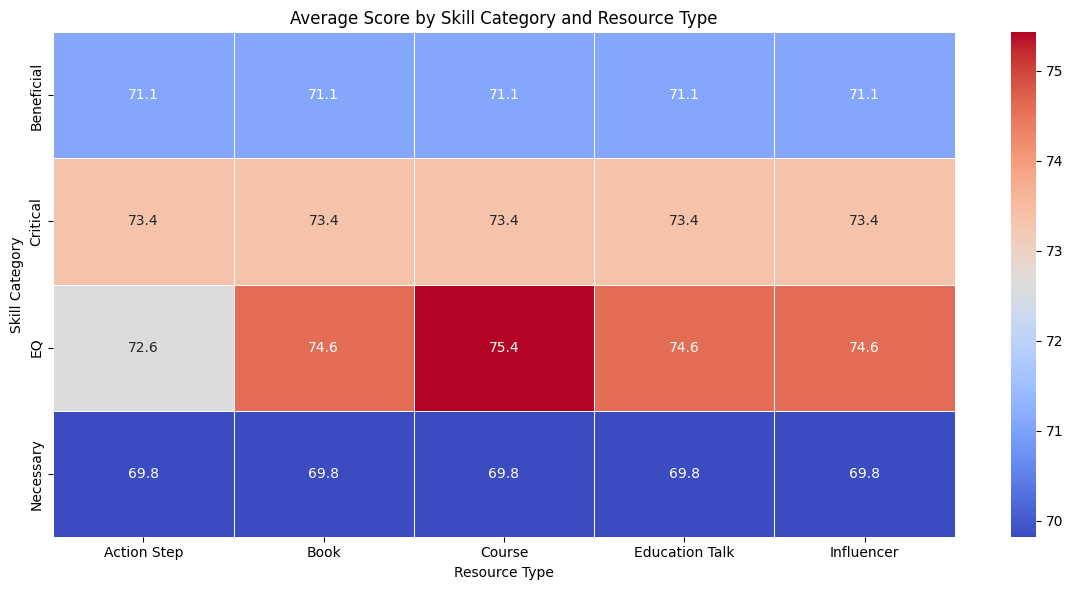

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure correct data types
df['Score'] = pd.to_numeric(df['Score'], errors='coerce')

# === 1. Distribution of Focus Skill Counts per Leader ===
skills_per_leader = df.groupby(['User ID', 'Leader'])['Skill'].nunique().reset_index(name='Skill Count')

plt.figure(figsize=(12, 6))
sns.histplot(skills_per_leader['Skill Count'], bins=range(1, 7), discrete=True)
plt.title('Number of Unique Focus Skills per Leader')
plt.xlabel('Unique Skills')
plt.ylabel('Number of Leaders')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# === 2. Average Scores by Skill Category ===
avg_score_by_category = df.groupby('Skill Category')['Score'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=avg_score_by_category, x='Skill Category', y='Score')
plt.title('Average Score by Skill Category')
plt.ylabel('Average Score')
plt.xlabel('Skill Category')
plt.ylim(0, 100)
plt.tight_layout()
plt.show()

# === 3. Most Frequent Focus Skills ===
top_skills = df['Skill'].value_counts().nlargest(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_skills.values, y=top_skills.index)
plt.title('Top 10 Most Frequent Focus Skills')
plt.xlabel('Frequency')
plt.ylabel('Skill')
plt.tight_layout()
plt.show()

# === 4. Resource Type Usage Across All Skills ===
resource_counts = df['Resource Type'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=resource_counts.values, y=resource_counts.index)
plt.title('Resource Type Distribution')
plt.xlabel('Count')
plt.ylabel('Resource Type')
plt.tight_layout()
plt.show()

# === 5. Heatmap: Average Score per Skill Category and Resource Type ===
pivot_heatmap = df.pivot_table(index='Skill Category', columns='Resource Type', values='Score', aggfunc='mean')

plt.figure(figsize=(12, 6))
sns.heatmap(pivot_heatmap, annot=True, cmap='coolwarm', fmt=".1f", linewidths=.5)
plt.title('Average Score by Skill Category and Resource Type')
plt.tight_layout()
plt.show()


In [8]:
import plotly.express as px
import plotly.graph_objects as go

# Ensure Score is numeric
df['Score'] = pd.to_numeric(df['Score'], errors='coerce')

# === 1. Count of Resource Types per Skill Category ===
resource_type_by_category = df.groupby(['Skill Category', 'Resource Type']).size().reset_index(name='Count')
fig1 = px.bar(resource_type_by_category, x='Skill Category', y='Count', color='Resource Type',
              title='Distribution of Resource Types per Skill Category', barmode='stack')
fig1.show()

# === 2. Score Distribution per Skill Category ===
fig2 = px.violin(df, x='Skill Category', y='Score', box=True, points='all',
                 title='Score Distribution by Skill Category')
fig2.show()

# === 3. Most Recommended Skills by Frequency ===
skill_counts = df['Skill'].value_counts().nlargest(10).reset_index()
skill_counts.columns = ['Skill', 'Count']
fig3 = px.bar(skill_counts, x='Skill', y='Count', title='Top 10 Most Frequently Targeted Skills')
fig3.show()

# === 4. Average Score by Resource Type ===
avg_score_by_resource = df.groupby('Resource Type')['Score'].mean().reset_index()
fig4 = px.bar(avg_score_by_resource, x='Resource Type', y='Score',
              title='Average Score by Resource Type', text_auto='.2s')
fig4.update_layout(yaxis_range=[0, 100])
fig4.show()

# === 5. Sunburst of Resource Distribution (Leader > Skill > Resource Type) ===
fig5 = px.sunburst(df, path=['Leader', 'Skill', 'Resource Type'],
                   values=None, title='Resource Distribution per Leader and Skill')
fig5.show()


In [9]:
# Switch to final CSV structure for insightful resource-related analysis

# === 1. How many resources per skill? ===
resources_per_skill = df.groupby('Skill')['Resource Text'].nunique().reset_index(name='Unique Resources')
fig1 = px.bar(resources_per_skill.sort_values('Unique Resources', ascending=False).head(15),
              x='Skill', y='Unique Resources',
              title='Top 15 Skills by Number of Unique Resources')
fig1.show()

# === 2. Average Score by Skill and Resource Type (Top 10 Frequent Skills) ===
top_skills = df['Skill'].value_counts().nlargest(10).index.tolist()
filtered_df = df[df['Skill'].isin(top_skills)]
avg_score_combo = filtered_df.groupby(['Skill', 'Resource Type'])['Score'].mean().reset_index()

fig2 = px.bar(avg_score_combo, x='Score', y='Skill', color='Resource Type',
              title='Avg Score by Skill & Resource Type (Top 10 Skills)', orientation='h',
              barmode='group')
fig2.show()

# === 3. Most Frequently Recommended Resource Texts ===
resource_text_counts = df['Resource Text'].value_counts().nlargest(15).reset_index()
resource_text_counts.columns = ['Resource Text', 'Count']
fig3 = px.bar(resource_text_counts, x='Count', y='Resource Text',
              title='Top 15 Most Frequently Recommended Resources', orientation='h')
fig3.show()

# === 4. Resource Type Breakdown per Skill (Treemap) ===
fig4 = px.treemap(df, path=['Skill', 'Resource Type'],
                  title='Resource Type Breakdown per Skill')
fig4.show()

# === 5. Distribution of Resource Types per Leader (Top 10 Leaders) ===
top_leaders = df['Leader'].value_counts().nlargest(10).index.tolist()
leader_resource_dist = df[df['Leader'].isin(top_leaders)]
fig5 = px.histogram(leader_resource_dist, x='Leader', color='Resource Type',
                    barmode='stack', title='Resource Type Distribution for Top 10 Leaders')
fig5.show()


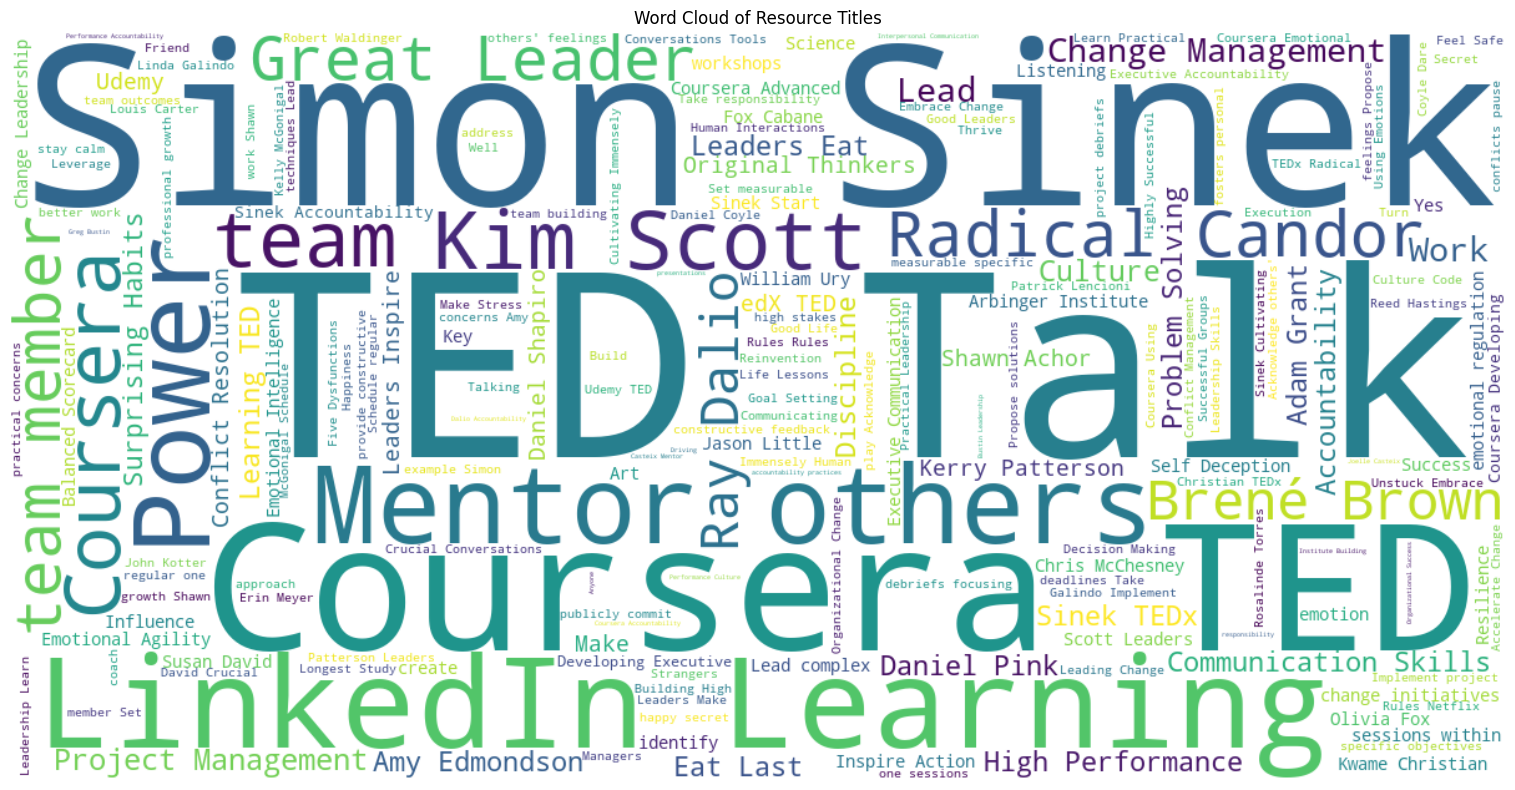

In [16]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# === 1. Word Cloud of Resource Titles ===
resource_text_combined = ' '.join(df['Resource Text'].dropna().astype(str).tolist())

wordcloud = WordCloud(width=1200, height=600, background_color='white', colormap='viridis').generate(resource_text_combined)

plt.figure(figsize=(16, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Resource Titles')
plt.tight_layout()
plt.show()


In [17]:
# Generate 10 additional relevant and creative visualizations using Plotly

# 1. Score Distribution Across Resource Types
fig1 = px.box(df, x='Resource Type', y='Score', points='all',
              title='Score Distribution by Resource Type')
fig1.show()

# 2. Heatmap: Skill vs. Resource Type Count
skill_resource_heatmap = df.groupby(['Skill', 'Resource Type']).size().reset_index(name='Count')
fig2 = px.density_heatmap(skill_resource_heatmap, x='Resource Type', y='Skill', z='Count', color_continuous_scale='Blues',
                          title='Skill vs. Resource Type Heatmap')
fig2.show()

# 3. Bubble Chart: Skill Size by Resource Count, Color by Avg Score
skill_bubble = df.groupby('Skill').agg({'Resource Text': 'count', 'Score': 'mean'}).reset_index()
skill_bubble.columns = ['Skill', 'Resource Count', 'Average Score']
fig3 = px.scatter(skill_bubble, x='Resource Count', y='Average Score', size='Resource Count', color='Average Score',
                  hover_name='Skill', title='Skill Bubble Chart: Resource Count vs. Avg Score')
fig3.show()

# 4. Resource Type Usage per Skill Category (Sunburst)
fig4 = px.sunburst(df, path=['Skill Category', 'Resource Type'],
                   title='Sunburst: Skill Category → Resource Type')
fig4.show()

# 5. Score Distribution Across Top 10 Skills
top_10_skills = df['Skill'].value_counts().nlargest(10).index.tolist()
fig5 = px.box(df[df['Skill'].isin(top_10_skills)], x='Skill', y='Score', color='Skill',
              title='Score Distribution for Top 10 Skills')
fig5.show()

# 6. Leader-wise Total Resources Recommended
resources_per_leader = df.groupby('Leader')['Resource Text'].count().reset_index(name='Total Resources')
fig6 = px.bar(resources_per_leader.sort_values('Total Resources', ascending=False).head(20),
              x='Total Resources', y='Leader', orientation='h',
              title='Top 20 Leaders by Total Resources Assigned')
fig6.show()

# 7. Distribution of Scores in Defined Buckets
df['Score Bucket'] = pd.cut(df['Score'], bins=[0, 24, 49, 74, 100], labels=['0-24', '25-49', '50-74', '75-100'])
fig7 = px.histogram(df, x='Score Bucket', color='Resource Type',
                    title='Distribution of Scores by Resource Type and Score Bucket', barmode='group')
fig7.show()

# 8. Skill Categories vs. Total Number of Resources
skill_cat_resources = df.groupby('Skill Category')['Resource Text'].count().reset_index(name='Total Resources')
fig8 = px.pie(skill_cat_resources, names='Skill Category', values='Total Resources',
              title='Resource Distribution by Skill Category')
fig8.show()

# 9. Correlation: Score vs. # of Resources per Skill
skill_resource_stats = df.groupby('Skill').agg({'Resource Text': 'count', 'Score': 'mean'}).reset_index()
fig9 = px.scatter(skill_resource_stats, x='Resource Text', y='Score',
                  title='Does More Resources = Higher Score?', labels={
                      'Resource Text': 'Resource Count', 'Score': 'Average Score'
                  })
fig9.show()

# 10. Top Resource Types for Low-Scoring Skills (<70)
low_scoring = df[df['Score'] < 70]
fig10 = px.histogram(low_scoring, x='Resource Type', color='Skill Category',
                     title='Resource Types Used for Low-Scoring Skills (<70)', barmode='group')
fig10.show()


## type of leader and type of resource / skill


In [18]:
# Generate 6 more advanced and creative insights-focused visualizations

# === 1. Top Influencers by Frequency (Who are the most used people?)
top_influencers = df[df['Resource Type'] == 'Influencer']['Resource Text'].value_counts().nlargest(10).reset_index()
top_influencers.columns = ['Influencer', 'Count']
fig1 = px.bar(top_influencers, x='Count', y='Influencer', orientation='h',
              title='Q: Who are the most recommended influencers across all skills?')
fig1.show()

# === 2. Skill Distribution by Score Bucket (Where are the pain points?)
fig2 = px.histogram(df, x='Skill', color='Score Bucket',
                    title='Q: Which skills appear most often in each score bucket?', barmode='stack')
fig2.update_layout(xaxis={'categoryorder':'total descending'})
fig2.show()

# === 3. Average Score by Skill Category and Resource Type (What works best for each category?)
avg_score_combo = df.groupby(['Skill Category', 'Resource Type'])['Score'].mean().reset_index()
fig3 = px.bar(avg_score_combo, x='Skill Category', y='Score', color='Resource Type',
              title='Q: What are the most effective resource types by skill category?', barmode='group')
fig3.show()

# === 4. Treemap: Distribution of All Resources (What’s the overall structure of learning content?)
fig4 = px.treemap(df, path=['Skill Category', 'Skill', 'Resource Type'],
                  title='Q: How are resources structured across categories, skills, and types?')
fig4.show()

# === 5. Distribution of Resources per Skill per Leader (Who has the most support per topic?)
skill_leader_combo = df.groupby(['Leader', 'Skill'])['Resource Text'].count().reset_index(name='Resource Count')
fig5 = px.scatter(skill_leader_combo, x='Leader', y='Skill', size='Resource Count', color='Resource Count',
                  title='Q: Which leaders have the most resource support for each skill?')
fig5.show()

# === 6. Radar Plot of Resource Type Usage by Skill Category (What format dominates each category?)
resource_by_cat = df.groupby(['Skill Category', 'Resource Type']).size().reset_index(name='Count')
pivot = resource_by_cat.pivot(index='Resource Type', columns='Skill Category', values='Count').fillna(0)
fig6 = go.Figure()

for cat in pivot.columns:
    fig6.add_trace(go.Scatterpolar(
        r=pivot[cat].values,
        theta=pivot.index,
        fill='toself',
        name=cat
    ))

fig6.update_layout(
    polar=dict(radialaxis=dict(visible=True)),
    showlegend=True,
    title='Q: Which resource types are used most across skill categories?'
)
fig6.show()


In [22]:
# Generate 10 brand-new insightful visualizations, each titled with the question it answers


# === 1. What are the most common learning formats used overall?
fig1 = px.pie(df, names='Resource Type',
              title='Q1: What are the most common learning formats used overall?')
fig1.show()

# === 2. Which skills have the lowest average score?
skill_avg_score = df.groupby('Skill')['Score'].mean().sort_values().reset_index()
fig2 = px.bar(skill_avg_score.head(10), x='Score', y='Skill', orientation='h',
              title='Q2: Which skills have the lowest average score?')
fig2.show()

# === 3. Which resource types are most used for EQ-related skills?
eq_df = df[df['Skill Category'] == 'EQ']
eq_resource_counts = eq_df['Resource Type'].value_counts().reset_index()
eq_resource_counts.columns = ['Resource Type', 'Count']
fig3 = px.bar(eq_resource_counts, x='Resource Type', y='Count',
              title='Q3: Which resource types are most used for EQ-related skills?')
fig3.show()


# === 5. How many unique skills are targeted per skill category?
skill_per_cat = df.groupby('Skill Category')['Skill'].nunique().reset_index(name='Unique Skills')
fig5 = px.bar(skill_per_cat, x='Skill Category', y='Unique Skills',
              title='Q5: How many unique skills are targeted per skill category?')
fig5.show()

# === 6. Which leaders are receiving the most diverse types of resources?
leader_diversity = df.groupby('Leader')['Resource Type'].nunique().reset_index(name='Resource Type Diversity')
fig6 = px.bar(leader_diversity.sort_values(by='Resource Type Diversity', ascending=False).head(15),
              x='Resource Type Diversity', y='Leader', orientation='h',
              title='Q6: Which leaders are receiving the most diverse types of resources?')
fig6.show()

# === 7. Which resource types dominate in low (<70) vs high (>=85) scoring skills?
df['Score Level'] = df['Score'].apply(lambda x: '<70' if x < 70 else '85+' if x >= 85 else '70–84')
score_resource_dist = df[df['Score Level'].isin(['<70', '85+'])]
fig7 = px.histogram(score_resource_dist, x='Resource Type', color='Score Level',
                    barmode='group',
                    title='Q7: Which resource types dominate in low vs. high scoring skills?')
fig7.show()

# === 8. How many total resources are being recommended per score level?
score_level_counts = df['Score Level'].value_counts().reset_index()
score_level_counts.columns = ['Score Level', 'Count']
fig8 = px.bar(score_level_counts, x='Score Level', y='Count',
              title='Q8: How many total resources are being recommended per score level?')
fig8.show()

# === 9. Which individual resources are being used for multiple skills?
resource_skill_counts = df.groupby('Resource Text')['Skill'].nunique().reset_index()
multi_skill_resources = resource_skill_counts[resource_skill_counts['Skill'] > 1].sort_values(by='Skill', ascending=False).head(10)
fig9 = px.bar(multi_skill_resources, x='Skill', y='Resource Text', orientation='h',
              title='Q9: Which resources are being used for multiple skills?')
fig9.show()

# === 10. What does the breakdown of action steps look like across skill categories?
action_df = df[df['Resource Type'] == 'Action Step']
action_cat_dist = action_df['Skill Category'].value_counts().reset_index()
action_cat_dist.columns = ['Skill Category', 'Count']
fig10 = px.pie(action_cat_dist, names='Skill Category', values='Count',
               title='Q10: What does the breakdown of action steps look like across skill categories?')
fig10.show()


In [208]:
test=pd.read_csv('../resources_summary.csv')
test

,User ID,# Dashboard,Leader,Position,Skill,Skill Category,Score,Resource Type,Resource Text,Link,Image URL
0,LDP0056,D3,EL Chami Hassan,PROJECT MANAGER-INDUSTRIAL,Project Management,Critical,84.0,Book,1. The Goal: A Process of Ongoing Improvement ...,https://www.amazon.com/Goal-Process-Ongoing-Im...,https://m.media-amazon.com/images/I/81xqKkowOn...
1,LDP0056,D3,EL Chami Hassan,PROJECT MANAGER-INDUSTRIAL,Project Management,Critical,84.0,Book,2. Drive by Daniel Pink,https://www.amazon.es/Drive-Daniel-H-Pink/dp/1...,https://m.media-amazon.com/images/I/71uTHTyxtw...
2,LDP0056,D3,EL Chami Hassan,PROJECT MANAGER-INDUSTRIAL,Project Management,Critical,84.0,Book,3. Execution: The Discipline of Getting Things...,https://www.amazon.es/Execution-Discipline-Get...,https://images-eu.ssl-images-amazon.com/images...
3,LDP0056,D3,EL Chami Hassan,PROJECT MANAGER-INDUSTRIAL,Project Management,Critical,84.0,Course,Advanced Project Management on Coursera,https://www.coursera.org/learn/ibm-project-man...,NaN
4,LDP0056,D3,EL Chami Hassan,PROJECT MANAGER-INDUSTRIAL,Project Management,Critical,84.0,Course,Mastering Project Management on LinkedIn Learning,https://www.linkedin.com/learning/mastering-pr...,NaN
...,...,...,...,...,...,...,...,...,...,...,...
5540,LDP9999,D9,Alabdullah Qassem,GOVERNMENT RELATION MANAGER,Emotional Intelligence,EQ,60.0,Education Talk,What Makes a Good Life? Lessons From the Longe...,https://www.youtube.com/watch?v=8KkKuTCFvzI,NaN
5541,LDP9999,D9,Alabdullah Qassem,GOVERNMENT RELATION MANAGER,Emotional Intelligence,EQ,60.0,Action Step,"During conflicts, pause to identify the emotio...",NaN,NaN
5542,LDP9999,D9,Alabdullah Qassem,GOVERNMENT RELATION MANAGER,Emotional Intelligence,EQ,60.0,Action Step,Acknowledge others' feelings.,NaN,NaN
5543,LDP9999,D9,Alabdullah Qassem,GOVERNMENT RELATION MANAGER,Emotional Intelligence,EQ,60.0,Action Step,Propose solutions that address both emotional ...,NaN,NaN


In [209]:
test.Leader.unique()

array(['EL Chami Hassan', 'Therese Hakim', 'Amani Alali', 'Daou Fares',
       'Hawilo Mahmoud', 'Elsawy Ahmed', 'El Kholy Mohamed',
       'Karkera Sudhir', 'Issa Nour', 'ALATTAS HASSAN', 'Taj Jamal',
       'Alshareef Mohammed', 'Issa Yousef', 'Kamel Mahmoud',
       'Alolaywi Mohammed', 'Baeshin Hani', 'Alsultan Salsabeel',
       'Ghazi Ibrahim Ayman', 'Aljishi Salam', 'Al-Yami Yousif',
       'Thomas Abraham', 'AL MILAIFY SAMI', 'Bayoumi Mahmoud',
       'Charbel Kamal', 'Youssef Shaher', 'Hefni Fathy Yosry',
       'Khater Mahmoud', 'Geara Andre', 'Alshehri Faisal', 'Najjar Paul',
       'Al-Shuwaiki Hesham', 'Mocled Ralph', 'Khayyat Amro',
       'Alhemaid Aisha', 'Almalki Jasem', 'El Jammal Waleed',
       'Jamal Rami', 'Alrabaya Khaled', 'Harb Fayssal',
       'Abu Raidah Abdullah', 'Hamdan Hesham', 'Chedid Elie',
       'Gilani Syed', 'Alhasan Naif', 'Mohammad Hallab', 'Alhabibi Wael',
       'Mikati Ibrahim', 'Attia Mohamed', 'Merhi Mouhamed',
       'Samarah Senan', 'Shadid

In [60]:
test[test['Leader']=='Amani Alali'].Skill.unique()

array(['Change Management', 'Emotional Intelligence', 'Listening Skills',
       'Building Effective Teams', 'Conflict Management'], dtype=object)

In [210]:
unique_skills_per_leader = test.groupby('Leader')['Skill'].nunique().reset_index()
unique_skills_per_leader.columns = ['Leader', 'Unique Skill Count']
unique_skills_per_leader

,Leader,Unique Skill Count
0,AL MILAIFY SAMI,5
1,ALATTAS HASSAN,5
2,ALQUDAH OBIEDA,9
3,ALZBOON ODEH,6
4,AZZAM AHMED,5
...,...,...
80,Valera Rommel,7
81,Warrier Vasudeva,5
82,Yazdani Nayar,5
83,Youssef Moustafa,5


In [140]:
test[test['Leader']=='Bshara Ayham']

,User ID,# Dashboard,Leader,Position,Skill,Skill Category,Score,Resource Type,Resource Text,Link,Image URL,FirstLast
4465,LDP5923,D5,Bshara Ayham,CONSTRUCTION MANAGER-CIVIL,Problem-Solving,Critical,74.0,Book,1. Smart Thinking by Art Markman,https://www.amazon.com/Smart-Thinking-Essentia...,https://m.media-amazon.com/images/I/51gyigdJ1B...,Bshara Ayham
4466,LDP5923,D5,Bshara Ayham,CONSTRUCTION MANAGER-CIVIL,Problem-Solving,Critical,74.0,Book,2. The Lean Startup by Eric Ries,https://www.amazon.com/Lean-Startup-Entreprene...,https://m.media-amazon.com/images/I/61BFOf9Ap-...,Bshara Ayham
4467,LDP5923,D5,Bshara Ayham,CONSTRUCTION MANAGER-CIVIL,Problem-Solving,Critical,74.0,Book,3. Thinking in Systems: A Primer by Donella H....,https://www.amazon.es/Thinking-Systems-Donella...,https://images-eu.ssl-images-amazon.com/images...,Bshara Ayham
4468,LDP5923,D5,Bshara Ayham,CONSTRUCTION MANAGER-CIVIL,Problem-Solving,Critical,74.0,Course,Problem-Solving Techniques for Sustainable Sol...,https://www.coursera.org/learn/problem-solving,NaN,Bshara Ayham
4469,LDP5923,D5,Bshara Ayham,CONSTRUCTION MANAGER-CIVIL,Problem-Solving,Critical,74.0,Course,Advanced Problem-Solving Skills on Coursera,https://www.coursera.org/learn/people-soft-ski...,NaN,Bshara Ayham
...,...,...,...,...,...,...,...,...,...,...,...,...
4571,LDP5923,D5,Bshara Ayham,CONSTRUCTION MANAGER-CIVIL,Emotional Intelligence,EQ,62.0,Education Talk,What Makes a Good Life? Lessons From the Longe...,https://www.youtube.com/watch?v=8KkKuTCFvzI,NaN,Bshara Ayham
4572,LDP5923,D5,Bshara Ayham,CONSTRUCTION MANAGER-CIVIL,Emotional Intelligence,EQ,62.0,Action Step,"During conflicts, pause to identify the emotio...",NaN,NaN,Bshara Ayham
4573,LDP5923,D5,Bshara Ayham,CONSTRUCTION MANAGER-CIVIL,Emotional Intelligence,EQ,62.0,Action Step,Acknowledge others' feelings.,NaN,NaN,Bshara Ayham
4574,LDP5923,D5,Bshara Ayham,CONSTRUCTION MANAGER-CIVIL,Emotional Intelligence,EQ,62.0,Action Step,Propose solutions that address both emotional ...,NaN,NaN,Bshara Ayham


In [85]:
test[test['Leader']=='Bshara Ayham'].Skill.unique()

array([], dtype=object)

In [190]:
test.Leader.nunique()

83

In [211]:


# Filter to only rows where the normalized leader name is in the matched list
filtered_test_df = test

filtered_test_df

,User ID,# Dashboard,Leader,Position,Skill,Skill Category,Score,Resource Type,Resource Text,Link,Image URL
0,LDP0056,D3,EL Chami Hassan,PROJECT MANAGER-INDUSTRIAL,Project Management,Critical,84.0,Book,1. The Goal: A Process of Ongoing Improvement ...,https://www.amazon.com/Goal-Process-Ongoing-Im...,https://m.media-amazon.com/images/I/81xqKkowOn...
1,LDP0056,D3,EL Chami Hassan,PROJECT MANAGER-INDUSTRIAL,Project Management,Critical,84.0,Book,2. Drive by Daniel Pink,https://www.amazon.es/Drive-Daniel-H-Pink/dp/1...,https://m.media-amazon.com/images/I/71uTHTyxtw...
2,LDP0056,D3,EL Chami Hassan,PROJECT MANAGER-INDUSTRIAL,Project Management,Critical,84.0,Book,3. Execution: The Discipline of Getting Things...,https://www.amazon.es/Execution-Discipline-Get...,https://images-eu.ssl-images-amazon.com/images...
3,LDP0056,D3,EL Chami Hassan,PROJECT MANAGER-INDUSTRIAL,Project Management,Critical,84.0,Course,Advanced Project Management on Coursera,https://www.coursera.org/learn/ibm-project-man...,NaN
4,LDP0056,D3,EL Chami Hassan,PROJECT MANAGER-INDUSTRIAL,Project Management,Critical,84.0,Course,Mastering Project Management on LinkedIn Learning,https://www.linkedin.com/learning/mastering-pr...,NaN
...,...,...,...,...,...,...,...,...,...,...,...
5540,LDP9999,D9,Alabdullah Qassem,GOVERNMENT RELATION MANAGER,Emotional Intelligence,EQ,60.0,Education Talk,What Makes a Good Life? Lessons From the Longe...,https://www.youtube.com/watch?v=8KkKuTCFvzI,NaN
5541,LDP9999,D9,Alabdullah Qassem,GOVERNMENT RELATION MANAGER,Emotional Intelligence,EQ,60.0,Action Step,"During conflicts, pause to identify the emotio...",NaN,NaN
5542,LDP9999,D9,Alabdullah Qassem,GOVERNMENT RELATION MANAGER,Emotional Intelligence,EQ,60.0,Action Step,Acknowledge others' feelings.,NaN,NaN
5543,LDP9999,D9,Alabdullah Qassem,GOVERNMENT RELATION MANAGER,Emotional Intelligence,EQ,60.0,Action Step,Propose solutions that address both emotional ...,NaN,NaN


In [212]:
filtered_test_df=filtered_test_df[['Leader', 'Skill','Skill Category', 'Score', 'Resource Type', 'Resource Text']]
filtered_test_df

,Leader,Skill,Skill Category,Score,Resource Type,Resource Text
0,EL Chami Hassan,Project Management,Critical,84.0,Book,1. The Goal: A Process of Ongoing Improvement ...
1,EL Chami Hassan,Project Management,Critical,84.0,Book,2. Drive by Daniel Pink
2,EL Chami Hassan,Project Management,Critical,84.0,Book,3. Execution: The Discipline of Getting Things...
3,EL Chami Hassan,Project Management,Critical,84.0,Course,Advanced Project Management on Coursera
4,EL Chami Hassan,Project Management,Critical,84.0,Course,Mastering Project Management on LinkedIn Learning
...,...,...,...,...,...,...
5540,Alabdullah Qassem,Emotional Intelligence,EQ,60.0,Education Talk,What Makes a Good Life? Lessons From the Longe...
5541,Alabdullah Qassem,Emotional Intelligence,EQ,60.0,Action Step,"During conflicts, pause to identify the emotio..."
5542,Alabdullah Qassem,Emotional Intelligence,EQ,60.0,Action Step,Acknowledge others' feelings.
5543,Alabdullah Qassem,Emotional Intelligence,EQ,60.0,Action Step,Propose solutions that address both emotional ...


In [213]:
filtered_test_df['Skill Category'].unique()

array(['Critical', 'Beneficial', 'EQ', 'Necessary'], dtype=object)

In [214]:
# Define thresholds
thresholds = {
    'Critical': 85,
    'Beneficial': 60,
    'Necessary': 70,
    'EQ':83.87
}


# Add "Below Threshold" column
filtered_test_df['Below Threshold'] = filtered_test_df.apply(lambda row: row['Score'] < thresholds.get(row['Skill Category'], 1000), axis=1)
filtered_test_df

/var/folders/6v/qvykl7vd2yb8gqx3qb10rc5m0000gn/T/ipykernel_21044/993237506.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Leader,Skill,Skill Category,Score,Resource Type,Resource Text,Below Threshold
0,EL Chami Hassan,Project Management,Critical,84.0,Book,1. The Goal: A Process of Ongoing Improvement ...,True
1,EL Chami Hassan,Project Management,Critical,84.0,Book,2. Drive by Daniel Pink,True
2,EL Chami Hassan,Project Management,Critical,84.0,Book,3. Execution: The Discipline of Getting Things...,True
3,EL Chami Hassan,Project Management,Critical,84.0,Course,Advanced Project Management on Coursera,True
4,EL Chami Hassan,Project Management,Critical,84.0,Course,Mastering Project Management on LinkedIn Learning,True
...,...,...,...,...,...,...,...
5540,Alabdullah Qassem,Emotional Intelligence,EQ,60.0,Education Talk,What Makes a Good Life? Lessons From the Longe...,True
5541,Alabdullah Qassem,Emotional Intelligence,EQ,60.0,Action Step,"During conflicts, pause to identify the emotio...",True
5542,Alabdullah Qassem,Emotional Intelligence,EQ,60.0,Action Step,Acknowledge others' feelings.,True
5543,Alabdullah Qassem,Emotional Intelligence,EQ,60.0,Action Step,Propose solutions that address both emotional ...,True


In [272]:
grouped = filtered_test_df.groupby(['Leader', 'Skill']).agg(
    Score=('Score', 'last'),
    Below_Threshold_Count=('Below Threshold', 'last'),
    Skill_category=('Skill Category', 'last'),

).reset_index()

# Optional: Add a percentage column

grouped

,Leader,Skill,Score,Below_Threshold_Count,Skill_category
0,AL MILAIFY SAMI,Accountability,78.0,True,Critical
1,AL MILAIFY SAMI,Building Effective Teams,80.0,False,Beneficial
2,AL MILAIFY SAMI,Emotional Intelligence,74.0,True,EQ
3,AL MILAIFY SAMI,Negotiating Ability,73.0,False,Beneficial
4,AL MILAIFY SAMI,Recruitment & Hiring,87.0,False,Necessary
...,...,...,...,...,...
493,Youssef Shaher,Change Management,90.0,False,Critical
494,Youssef Shaher,Communication Skills,86.0,False,Critical
495,Youssef Shaher,Emotional Intelligence,79.0,True,EQ
496,Youssef Shaher,Emotional Self-awareness,78.0,False,Beneficial


In [216]:
grouped = grouped[(grouped['Leader'] == 'Attia Mohamed') | (grouped['Leader'] == 'Kamel Mahmoud')]
grouped


,Leader,Skill,Score,Below_Threshold_Count,Skill_category
194,Attia Mohamed,Accountability,75.0,True,Critical
195,Attia Mohamed,Building Effective Teams,49.0,True,Necessary
196,Attia Mohamed,Communication Skills,60.0,True,Critical
197,Attia Mohamed,Conflict Management,60.0,True,Necessary
198,Attia Mohamed,Emotional Intelligence,65.0,True,EQ
199,Attia Mohamed,Measuring & Evaluating Results,56.0,True,Necessary
200,Attia Mohamed,Negotiating Ability,53.0,True,Beneficial
201,Attia Mohamed,Problem-Solving,80.0,True,Critical
338,Kamel Mahmoud,Calculated Risk-Taking,61.0,False,Beneficial
339,Kamel Mahmoud,Change Management,74.0,False,Necessary


In [217]:
grouped.to_csv('grouped_new_leaders.csv', index=False)

In [170]:
import plotly.express as px

heatmap_df = grouped[grouped['Below_Threshold_Count'] == True].copy()
heatmap_df['Below'] = 1  # Binary indicator

pivot = heatmap_df.pivot_table(index='Skill', columns='Leader', values='Below', fill_value=0)

fig4 = px.imshow(pivot,
                 labels=dict(x="Leader", y="Skill", color="Below Threshold"),
                 title="Heatmap of Below Threshold Skills by Leader",
                 color_continuous_scale="Reds",
                 aspect="auto")
fig4.show()


In [168]:
import plotly.express as px

skill_below = grouped[grouped['Below_Threshold_Count'] == True]['Skill'].value_counts().reset_index()
skill_below.columns = ['Skill', 'Below Threshold Count']

fig1 = px.bar(skill_below, x='Below Threshold Count', y='Skill', orientation='h',
              title='Skills Most Frequently Below Threshold',
              color='Below Threshold Count', color_continuous_scale='Reds')
fig1.update_layout(yaxis=dict(autorange="reversed"))
fig1.show()


In [172]:
import plotly.express as px

def plot_leaders_below_threshold(group, top_n=10, selected_skill=None):
    """
    Plots a vertical bar chart of the top N leaders with the most skills below threshold.

    Parameters:
    - group (pd.DataFrame): DataFrame containing 'Leader', 'Below_Threshold_Count', and 'Skill'.
    - top_n (int): Number of top leaders to display (default is 10).
    - selected_skill (str, optional): Specific skill to filter by. If None, shows all skills.

    Returns:
    - fig (plotly.graph_objs._figure.Figure): Plotly figure object.
    """
    
    # Filter by the selected skill (if provided)
    if selected_skill:
        filtered_group = group[group['Skill'] == selected_skill]
    else:
        filtered_group = group

    # Get leaders with skills below threshold
    leaders_below = filtered_group[filtered_group['Below_Threshold_Count'] == True]['Leader'].value_counts().reset_index()
    leaders_below.columns = ['Leader', 'Below Threshold Count']

    # Get the top N leaders with the most skills below threshold
    leaders_below = leaders_below.head(top_n)

    # Create the vertical bar chart
    fig = px.bar(leaders_below, x='Leader', y='Below Threshold Count',
                 title=f'Top {top_n} Leaders with the Most Skills Below Threshold',
                 color='Below Threshold Count', color_continuous_scale='Reds')
    
    # Update layout to make the chart vertical
    fig.update_layout(
        xaxis_title='Leader',
        yaxis_title='Below Threshold Count',
        xaxis={'tickangle': 45},  # Rotate x-axis labels for better readability
        height=600
    )
    
    fig.show()

# Example usage:
# Call the function with the group DataFrame, specifying the number of leaders (e.g., top 10) 
# and a specific skill if desired (e.g., "Emotional Intelligence")
plot_leaders_below_threshold(grouped, top_n=10)


In [96]:
test.Leader.unique()

array(['EL Chami Hassan', 'Therese Hakim', 'Amani Alali', 'Daou Fares',
       'Hawilo Mahmoud', 'Elsawy Ahmed', 'El Kholy Mohamed',
       'Karkera Sudhir', 'Issa Nour', 'ALATTAS HASSAN', 'Taj Jamal',
       'Alshareef Mohammed', 'Issa Yousef', 'Alolaywi Mohammed',
       'Baeshin Hani', 'Alsultan Salsabeel', 'Ghazi Ibrahim Ayman',
       'Aljishi Salam', 'Al-Yami Yousif', 'Thomas Abraham',
       'AL MILAIFY SAMI', 'Bayoumi Mahmoud', 'Charbel Kamal',
       'Youssef Shaher', 'Hefni Fathy Yosry', 'Khater Mahmoud',
       'Geara Andre', 'Alshehri Faisal', 'Najjar Paul',
       'Al-Shuwaiki Hesham', 'Mocled Ralph', 'Khayyat Amro',
       'Alhemaid Aisha', 'Almalki Jasem', 'El Jammal Waleed',
       'Jamal Rami', 'Alrabaya Khaled', 'Harb Fayssal',
       'Abu Raidah Abdullah', 'Hamdan Hesham', 'Chedid Elie',
       'Gilani Syed', 'Alhasan Naif', 'Mohammad Hallab', 'Alhabibi Wael',
       'Mikati Ibrahim', 'Merhi Mouhamed', 'Samarah Senan',
       'Shadid George', 'Suleiman Hussain', 'You

In [102]:
df

,User ID,# Dashboard,Leader,Position,Skill,Skill Category,Score,Resource Type,Resource Text,Link,Image URL,Score Bucket,Score Level
0,LDP0056,D3,EL Chami Hassan,PROJECT MANAGER-INDUSTRIAL,Project Management,Critical,84.0,Book,1. The Goal: A Process of Ongoing Improvement ...,https://www.amazon.com/Goal-Process-Ongoing-Im...,https://m.media-amazon.com/images/I/81xqKkowOn...,75-100,70–84
1,LDP0056,D3,EL Chami Hassan,PROJECT MANAGER-INDUSTRIAL,Project Management,Critical,84.0,Book,2. Drive by Daniel Pink,https://www.amazon.es/Drive-Daniel-H-Pink/dp/1...,https://m.media-amazon.com/images/I/71uTHTyxtw...,75-100,70–84
2,LDP0056,D3,EL Chami Hassan,PROJECT MANAGER-INDUSTRIAL,Project Management,Critical,84.0,Book,3. Execution: The Discipline of Getting Things...,https://www.amazon.es/Execution-Discipline-Get...,https://images-eu.ssl-images-amazon.com/images...,75-100,70–84
3,LDP0056,D3,EL Chami Hassan,PROJECT MANAGER-INDUSTRIAL,Project Management,Critical,84.0,Course,Advanced Project Management on Coursera,https://www.coursera.org/learn/ibm-project-man...,NaN,75-100,70–84
4,LDP0056,D3,EL Chami Hassan,PROJECT MANAGER-INDUSTRIAL,Project Management,Critical,84.0,Course,Mastering Project Management on LinkedIn Learning,https://www.linkedin.com/learning/mastering-pr...,NaN,75-100,70–84
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4601,LDP9999,D9,Alabdullah Qassem,GOVERNMENT RELATION MANAGER,Negotiating Ability,Necessary,69.0,Education Talk,TEDx: Negotiation Techniques by Ruchi Sinha,https://www.youtube.com/watch?v=Z3HJCQJ2Lmo,NaN,50-74,<70
4602,LDP9999,D9,Alabdullah Qassem,GOVERNMENT RELATION MANAGER,Negotiating Ability,Necessary,69.0,Action Step,Use the “interest-based” negotiation approach ...,NaN,NaN,50-74,<70
4603,LDP9999,D9,Alabdullah Qassem,GOVERNMENT RELATION MANAGER,Negotiating Ability,Necessary,69.0,Action Step,Attend negotiation workshops and practice with...,NaN,NaN,50-74,<70
4604,LDP9999,D9,Alabdullah Qassem,GOVERNMENT RELATION MANAGER,Negotiating Ability,Necessary,69.0,Action Step,Refine emotional regulation techniques to stay...,NaN,NaN,50-74,<70


In [101]:
man.Manager.unique()

array(['ABBAS ALI GHULOOM HAJI', 'ABDULLAH ABDULAZIZ SALEH BIN DUAILEJ',
       'ADNAN MAHMOUD ELSAKAKINI', 'AHMAD REK ELBAKHOUR',
       'AHMED IBRAHIM ALABDULLAH', 'AHMED MOHAMMED ELBASSYONY SHABAN',
       'AMJED KHALED MOHAMMAD ABUKHADRAH', 'ANTOINE KFOURI',
       'AYHAM JEHAD BSHARA', 'BACHIR WILLIAM SEBAALY',
       'BASSEL MOHAMAD ELRIFAI', 'BECHARA EL HAYEK',
       'BILAL MOHAMAD ANSARI', 'BRIAN GLYNN', 'CEMAL MURAT ALTUN',
       'ELIAS KHATER', 'ELIAS SHADID', 'FAISAL HMOUD OTHMAN ALSHEHRI',
       'HADI SAMI ABI HAIDAR', 'HANI MOHAMMED ABDULQADER BAESHEN',
       'HASSAN ELZAATARI', 'HAYTHAM KALASH',
       'HOUSAM AHMED MUKHTAR IBRAHIMBASHA', 'JOSEPH BAHR ALILOOM',
       'KHALED HAMOUD HENADI AL DAHRI', 'LEKH RAJ SHARMA',
       'LOAI YOUNIS JASER AHMED', 'MAHMOUD ABDELWAHAB MOHAMED BAYOUMI',
       'MAHMOUD ALI MOHAMED SAYED KHATER', 'MICKAEL EL FAKHOURY',
       'MOHAMAD ALI ABDUL SATER', 'MOHAMAD MOUBARAK',
       'MOHAMAD NASSER ASSAAD', 'MOHAMED AHMED FARID IBRAHIM 

In [256]:
df = pd.read_csv('../LDP_summary.csv')
df['Dashboard Number'] = df['# Dashboard'].str.split(':', n=1).str[0].str.strip()
df['Leader'] = df['Last name'].str.strip() + ' ' + df['First name'].str.strip()
resource=pd.read_csv('../resources_summary.csv')

In [258]:
df

,# Dashboard,ID,Account,Last name,Middle name,First name,Position,Email,Date completed,Completion time,...,Beneficial Skills,LIS,Mapped Skills,Books,Education_Talks,Action_Steps,Courses,Influencers,Dashboard Number,Leader
0,D12,LDP0394,LDP100,Amani,NaN,Alali,CORPORATE CULTURE & TRAINING MANAGER,amani.alali@nesmapartners.com,NaN,NaN,...,95.2,90.5050,"['Communication Skills', 'Training & Onboardin...","[{'skill': 'Communication Skills', 'text': '1....","[{'skill': 'Communication Skills', 'text': 'TE...","[{'skill': 'Communication Skills', 'text': 'Me...","[{'skill': 'Communication Skills', 'text': 'Ex...","[{'skill': 'Communication Skills', 'text': 'Br...",D12,Amani Alali
1,D4,LDP4315,LDP100,Alhasan,NaN,Naif,SITE MANAGER - CIVIL,naif.alhasan@nesmapartners.com,2025-01-14,01:08:55,...,61.6,73.3140,"['Problem-Solving', 'Project Management', 'Org...","[{'skill': 'Problem-Solving', 'text': '1. The ...","[{'skill': 'Problem-Solving', 'text': 'TED Tal...","[{'skill': 'Problem-Solving', 'text': 'Mentor ...","[{'skill': 'Problem-Solving', 'text': 'Design ...","[{'skill': 'Problem-Solving', 'text': 'Ray Dal...",D4,Alhasan Naif
2,D6,LDP0127,LDP100,Therese,Hayek,Hakim,PROCUREMENT MANAGER-OFFICE SUPPLY,therese.hayek@nesmapartners.com,2025-01-10,01:17:10,...,81.0,76.2050,"['Problem-Solving', 'Project Management', 'Inf...","[{'skill': 'Problem-Solving', 'text': '1. The ...","[{'skill': 'Problem-Solving', 'text': 'TED Tal...","[{'skill': 'Problem-Solving', 'text': 'Mentor ...","[{'skill': 'Problem-Solving', 'text': 'Design ...","[{'skill': 'Problem-Solving', 'text': 'Ray Dal...",D6,Therese Hakim
3,D5,LDP4802,LDP100,Youssef,NaN,Moustafa,COMMISSIONING MANAGER,moustafa.youssef@nesmapartners.com,2025-01-13,02:24:32,...,82.4,75.4210,"['Problem-Solving', 'Project Management', 'Com...","[{'skill': 'Problem-Solving', 'text': '1. The ...","[{'skill': 'Problem-Solving', 'text': 'TED Tal...","[{'skill': 'Problem-Solving', 'text': 'Mentor ...","[{'skill': 'Problem-Solving', 'text': 'Design ...","[{'skill': 'Problem-Solving', 'text': 'Ray Dal...",D5,Youssef Moustafa
4,D13,LDP1313,LDP100,Al-Yami,NaN,Yousif,SUPPORT SERVICES MANAGER,yousif.alyami@nesmapartners.com,2025-01-12,01:37:15,...,89.2,81.1940,"['Organization Skills', 'Problem-Solving', 'Co...","[{'skill': 'Organization Skills', 'text': '1. ...","[{'skill': 'Organization Skills', 'text': 'TED...","[{'skill': 'Organization Skills', 'text': 'Men...","[{'skill': 'Organization Skills', 'text': 'Adv...","[{'skill': 'Organization Skills', 'text': 'Ray...",D13,Al-Yami Yousif
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,D13,LDP1355,LDP 100,Thomas,NaN,Abraham,TRAVEL & TICKETING MANAGER,abraham.thomas@nesmapartners.com,2025-03-27,01:00:16,...,77.8,74.4560,"['Organization Skills', 'Problem-Solving', 'Co...","[{'skill': 'Organization Skills', 'text': '1. ...","[{'skill': 'Organization Skills', 'text': 'TED...","[{'skill': 'Organization Skills', 'text': 'Men...","[{'skill': 'Organization Skills', 'text': 'Adv...","[{'skill': 'Organization Skills', 'text': 'Ray...",D13,Thomas Abraham
81,D5,LDP5944,LDP 100,Afzal,NaN,Rana,SR. PLANNING MANAGER,rana.afzal@nesmapartners.com,2025-03-29,01:29:00,...,78.6,79.0265,"['Problem-Solving', 'Project Management', 'Com...","[{'skill': 'Problem-Solving', 'text': '1. Smar...","[{'skill': 'Problem-Solving', 'text': 'TED Tal...","[{'skill': 'Problem-Solving', 'text': 'Use too...","[{'skill': 'Problem-Solving', 'text': 'Problem...","[{'skill': 'Problem-Solving', 'text': 'Simon S...",D5,Afzal Rana
82,D6,LDP6929,LDP 100,Sadaka,NaN,Mouhamed,QS MANAGER,mouhamed.sadaka@nesmapartners.com,2025-03-29,02:01:44,...,84.4,81.2910,"['Problem-Solving', 'Project Management', 'Inf...","[{'skill': 'Problem-Solving', 'text': '1. The ...","[{'skill': 'Problem-Solving', 'text': 'TED Tal...","[{'skill': 'Problem-Solving', 'text': 'Mentor ...","[{'skill': 'Problem-Solving', 'text': 'Design ...","[{'skill': 'Problem-Solving', 'text': 'Ray Dal...",D6,Sadaka Mouhamed


In [248]:
resource.loc[
    (resource['Leader'] == 'EL Chami Hassan') & (resource['Skill'] == 'Communication Skills'),
    'Score'
]=56


In [262]:
dashboard_mapping = {
    'D2': 'D2: Executive Level Operations',
    'D3': 'D3: Senior Management - Operations and Logistics',
    'D4': 'D4: Logistics and Site Management',
    'D5': 'D5: Engineering and Technical Management',
    'D6': 'D6: Procurement and Supply Chain Management',
    'D7': 'D7: Corporate Quality Assurance and Control',
    'D8': 'D8: Health, Safety, and Security',
    'D9': 'D9: Corporate Governance and Compliance',
    'D10': 'D10: Financial and Risk Control',
    'D11': 'D11: Corporate Strategy and Business Development',
    'D12': 'D12: Corporate Communications and Training',
    'D13': 'D13: Administrative and Support Services',
}

df["# Dashboard"] = df["# Dashboard"].map(dashboard_mapping)
df

,# Dashboard,ID,Account,Last name,Middle name,First name,Position,Email,Date completed,Completion time,...,Beneficial Skills,LIS,Mapped Skills,Books,Education_Talks,Action_Steps,Courses,Influencers,Dashboard Number,Leader
0,D12: Corporate Communications and Training,LDP0394,LDP100,Amani,NaN,Alali,CORPORATE CULTURE & TRAINING MANAGER,amani.alali@nesmapartners.com,NaN,NaN,...,95.2,90.5050,"['Communication Skills', 'Training & Onboardin...","[{'skill': 'Communication Skills', 'text': '1....","[{'skill': 'Communication Skills', 'text': 'TE...","[{'skill': 'Communication Skills', 'text': 'Me...","[{'skill': 'Communication Skills', 'text': 'Ex...","[{'skill': 'Communication Skills', 'text': 'Br...",D12,Amani Alali
1,D4: Logistics and Site Management,LDP4315,LDP100,Alhasan,NaN,Naif,SITE MANAGER - CIVIL,naif.alhasan@nesmapartners.com,2025-01-14,01:08:55,...,61.6,73.3140,"['Problem-Solving', 'Project Management', 'Org...","[{'skill': 'Problem-Solving', 'text': '1. The ...","[{'skill': 'Problem-Solving', 'text': 'TED Tal...","[{'skill': 'Problem-Solving', 'text': 'Mentor ...","[{'skill': 'Problem-Solving', 'text': 'Design ...","[{'skill': 'Problem-Solving', 'text': 'Ray Dal...",D4,Alhasan Naif
2,D6: Procurement and Supply Chain Management,LDP0127,LDP100,Therese,Hayek,Hakim,PROCUREMENT MANAGER-OFFICE SUPPLY,therese.hayek@nesmapartners.com,2025-01-10,01:17:10,...,81.0,76.2050,"['Problem-Solving', 'Project Management', 'Inf...","[{'skill': 'Problem-Solving', 'text': '1. The ...","[{'skill': 'Problem-Solving', 'text': 'TED Tal...","[{'skill': 'Problem-Solving', 'text': 'Mentor ...","[{'skill': 'Problem-Solving', 'text': 'Design ...","[{'skill': 'Problem-Solving', 'text': 'Ray Dal...",D6,Therese Hakim
3,D5: Engineering and Technical Management,LDP4802,LDP100,Youssef,NaN,Moustafa,COMMISSIONING MANAGER,moustafa.youssef@nesmapartners.com,2025-01-13,02:24:32,...,82.4,75.4210,"['Problem-Solving', 'Project Management', 'Com...","[{'skill': 'Problem-Solving', 'text': '1. The ...","[{'skill': 'Problem-Solving', 'text': 'TED Tal...","[{'skill': 'Problem-Solving', 'text': 'Mentor ...","[{'skill': 'Problem-Solving', 'text': 'Design ...","[{'skill': 'Problem-Solving', 'text': 'Ray Dal...",D5,Youssef Moustafa
4,D13: Administrative and Support Services,LDP1313,LDP100,Al-Yami,NaN,Yousif,SUPPORT SERVICES MANAGER,yousif.alyami@nesmapartners.com,2025-01-12,01:37:15,...,89.2,81.1940,"['Organization Skills', 'Problem-Solving', 'Co...","[{'skill': 'Organization Skills', 'text': '1. ...","[{'skill': 'Organization Skills', 'text': 'TED...","[{'skill': 'Organization Skills', 'text': 'Men...","[{'skill': 'Organization Skills', 'text': 'Adv...","[{'skill': 'Organization Skills', 'text': 'Ray...",D13,Al-Yami Yousif
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,D13: Administrative and Support Services,LDP1355,LDP 100,Thomas,NaN,Abraham,TRAVEL & TICKETING MANAGER,abraham.thomas@nesmapartners.com,2025-03-27,01:00:16,...,77.8,74.4560,"['Organization Skills', 'Problem-Solving', 'Co...","[{'skill': 'Organization Skills', 'text': '1. ...","[{'skill': 'Organization Skills', 'text': 'TED...","[{'skill': 'Organization Skills', 'text': 'Men...","[{'skill': 'Organization Skills', 'text': 'Adv...","[{'skill': 'Organization Skills', 'text': 'Ray...",D13,Thomas Abraham
81,D5: Engineering and Technical Management,LDP5944,LDP 100,Afzal,NaN,Rana,SR. PLANNING MANAGER,rana.afzal@nesmapartners.com,2025-03-29,01:29:00,...,78.6,79.0265,"['Problem-Solving', 'Project Management', 'Com...","[{'skill': 'Problem-Solving', 'text': '1. Smar...","[{'skill': 'Problem-Solving', 'text': 'TED Tal...","[{'skill': 'Problem-Solving', 'text': 'Use too...","[{'skill': 'Problem-Solving', 'text': 'Problem...","[{'skill': 'Problem-Solving', 'text': 'Simon S...",D5,Afzal Rana
82,D6: Procurement and Supply Chain Management,LDP6929,LDP 100,Sadaka,NaN,Mouhamed,QS MANAGER,mouhamed.sadaka@nesmapartners.com,2025-03-29,02:01:44,...,84.4,81.2910,"['Problem-Solving', 'Project

In [263]:
df.to_csv('../LDP_summary.csv', index=False)

In [270]:
df.columns

Index(['# Dashboard', 'ID', 'Account', 'Last name', 'Middle name',
       'First name', 'Position', 'Email', 'Date completed', 'Completion time',
       'Overall Results',
       'Emotional Identification, Perception, and Expression',
       'Emotional Facilitation of Thought', 'Emotional Understanding',
       'Emotional Management', 'Emotional Self-awareness',
       'Awareness of Strengths and Limitations', 'Comfort with Emotions',
       'Recognition of Other's Emotions', 'Rumination', 'Problem-Solving',
       'Positive Mindset', 'Emotional Reflection', 'Emotional Integration',
       'Conflict-Resolution Knowledge', 'Empathy', 'Social Insight',
       'Self-Control', 'Resilience/Hardiness', 'Coping Skills',
       'Self-Motivation', 'Striving', 'Emotional Selectivity',
       'Adaptable Social Skills', 'Conflict-Resolution Behavior',
       'Account_manssa', 'Last name_manssa', 'Middle name_manssa',
       'First name_manssa', 'Date completed_manssa', 'Completion time_manssa',
  

In [207]:
resource[resource['Skill Category']=='EQ']

,User ID,# Dashboard,Leader,Position,Skill,Skill Category,Score,Resource Type,Resource Text,Link,Image URL,Dashboard Code,Below Threshold
66,LDP0056,D3: Senior Management - Operations and Logistics,EL Chami Hassan,PROJECT MANAGER-INDUSTRIAL,Emotional Intelligence,EQ,63.0,Book,"1. Emotional Agility: Get Unstuck, Embrace Cha...",https://www.amazon.com/Emotional-Agility-Unstu...,https://m.media-amazon.com/images/I/71NREGxbyt...,D3,True
67,LDP0056,D3: Senior Management - Operations and Logistics,EL Chami Hassan,PROJECT MANAGER-INDUSTRIAL,Emotional Intelligence,EQ,63.0,Book,2. Crucial Conversations: Tools for Talking Wh...,https://www.amazon.com/Crucial-Conversations-T...,https://m.media-amazon.com/images/I/61XS2rm66h...,D3,True
68,LDP0056,D3: Senior Management - Operations and Logistics,EL Chami Hassan,PROJECT MANAGER-INDUSTRIAL,Emotional Intelligence,EQ,63.0,Book,3. Leaders Eat Last by Simon Sinek,https://www.amazon.com/Leaders-Eat-Last-Togeth...,https://www.amazon.com/Leaders-Eat-Last-Togeth...,D3,True
69,LDP0056,D3: Senior Management - Operations and Logistics,EL Chami Hassan,PROJECT MANAGER-INDUSTRIAL,Emotional Intelligence,EQ,63.0,Course,Cultivating Immensely Human Interactions on Co...,https://www.coursera.org/learn/emotional-intel...,NaN,D3,True
70,LDP0056,D3: Senior Management - Operations and Logistics,EL Chami Hassan,PROJECT MANAGER-INDUSTRIAL,Emotional Intelligence,EQ,63.0,Course,Emotional Intelligence for Managers on Udemy,https://www.udemy.com/course/emotional-intelli...,NaN,D3,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5395,LDP9999,D9: Corporate Governance and Compliance,Alabdullah Qassem,GOVERNMENT RELATION MANAGER,Emotional Intelligence,EQ,60.0,Education Talk,What Makes a Good Life? Lessons From the Longe...,https://www.youtube.com/watch?v=8KkKuTCFvzI,NaN,D9,True
5396,LDP9999,D9: Corporate Governance and Compliance,Alabdullah Qassem,GOVERNMENT RELATION MANAGER,Emotional Intelligence,EQ,60.0,Action Step,"During conflicts, pause to identify the emotio...",NaN,NaN,D9,True
5397,LDP9999,D9: Corporate Governance and Compliance,Alabdullah Qassem,GOVERNMENT RELATION MANAGER,Emotional Intelligence,EQ,60.0,Action Step,Acknowledge others' feelings.,NaN,NaN,D9,True
5398,LDP9999,D9: Corporate Governance and Compliance,Alabdullah Qassem,GOVERNMENT RELATION MANAGER,Emotional Intelligence,EQ,60.0,Action Step,Propose solutions that address both emotional ...,NaN,NaN,D9,True


In [227]:
# Define thresholds
thresholds = {
    'Critical': 85,
    'Beneficial': 60,
    'Necessary': 70,
    'EQ':83.87
}


# Add "Below Threshold" column
resource['Below Threshold'] = resource.apply(lambda row: row['Score'] < thresholds.get(row['Skill Category'], 1000), axis=1)
resource

,User ID,# Dashboard,Leader,Position,Skill,Skill Category,Score,Resource Type,Resource Text,Link,Image URL,Below Threshold
0,LDP0056,D3,EL Chami Hassan,PROJECT MANAGER-INDUSTRIAL,Project Management,Critical,84.0,Book,1. The Goal: A Process of Ongoing Improvement ...,https://www.amazon.com/Goal-Process-Ongoing-Im...,https://m.media-amazon.com/images/I/81xqKkowOn...,True
1,LDP0056,D3,EL Chami Hassan,PROJECT MANAGER-INDUSTRIAL,Project Management,Critical,84.0,Book,2. Drive by Daniel Pink,https://www.amazon.es/Drive-Daniel-H-Pink/dp/1...,https://m.media-amazon.com/images/I/71uTHTyxtw...,True
2,LDP0056,D3,EL Chami Hassan,PROJECT MANAGER-INDUSTRIAL,Project Management,Critical,84.0,Book,3. Execution: The Discipline of Getting Things...,https://www.amazon.es/Execution-Discipline-Get...,https://images-eu.ssl-images-amazon.com/images...,True
3,LDP0056,D3,EL Chami Hassan,PROJECT MANAGER-INDUSTRIAL,Project Management,Critical,84.0,Course,Advanced Project Management on Coursera,https://www.coursera.org/learn/ibm-project-man...,NaN,True
4,LDP0056,D3,EL Chami Hassan,PROJECT MANAGER-INDUSTRIAL,Project Management,Critical,84.0,Course,Mastering Project Management on LinkedIn Learning,https://www.linkedin.com/learning/mastering-pr...,NaN,True
...,...,...,...,...,...,...,...,...,...,...,...,...
5540,LDP9999,D9,Alabdullah Qassem,GOVERNMENT RELATION MANAGER,Emotional Intelligence,EQ,60.0,Education Talk,What Makes a Good Life? Lessons From the Longe...,https://www.youtube.com/watch?v=8KkKuTCFvzI,NaN,True
5541,LDP9999,D9,Alabdullah Qassem,GOVERNMENT RELATION MANAGER,Emotional Intelligence,EQ,60.0,Action Step,"During conflicts, pause to identify the emotio...",NaN,NaN,True
5542,LDP9999,D9,Alabdullah Qassem,GOVERNMENT RELATION MANAGER,Emotional Intelligence,EQ,60.0,Action Step,Acknowledge others' feelings.,NaN,NaN,True
5543,LDP9999,D9,Alabdullah Qassem,GOVERNMENT RELATION MANAGER,Emotional Intelligence,EQ,60.0,Action Step,Propose solutions that address both emotional ...,NaN,NaN,True


In [234]:
df

,# Dashboard,ID,Account,Last name,Middle name,First name,Position,Email,Date completed,Completion time,...,Drive,Positive Mindset_manssa,Steady Effort,Key Skills,Necessary Skills,Beneficial Skills,LIS,Dashboard Number,Leader,Dashboard Code
0,D12: Corporate Communications and Training,LDP0394,LDP100,Amani,NaN,Alali,CORPORATE CULTURE & TRAINING MANAGER,amani.alali@nesmapartners.com,NaN,NaN,...,100,79,86,95.25,92.20,95.2,90.5050,D12,Amani Alali,D12
1,D4: Logistics and Site Management,LDP4315,LDP100,Alhasan,NaN,Naif,SITE MANAGER - CIVIL,naif.alhasan@nesmapartners.com,2025-01-14,01:08:55,...,73,35,73,80.00,77.00,61.6,73.3140,D4,Alhasan Naif,D4
2,D6: Procurement and Supply Chain Management,LDP0127,LDP100,Therese,Hayek,Hakim,PROCUREMENT MANAGER-OFFICE SUPPLY,therese.hayek@nesmapartners.com,2025-01-10,01:17:10,...,93,86,64,78.00,81.50,81.0,76.2050,D6,Therese Hakim,D6
3,D5: Engineering and Technical Management,LDP4802,LDP100,Youssef,NaN,Moustafa,COMMISSIONING MANAGER,moustafa.youssef@nesmapartners.com,2025-01-13,02:24:32,...,97,81,71,81.20,74.50,82.4,75.4210,D5,Youssef Moustafa,D5
4,D13: Administrative and Support Services,LDP1313,LDP100,Al-Yami,NaN,Yousif,SUPPORT SERVICES MANAGER,yousif.alyami@nesmapartners.com,2025-01-12,01:37:15,...,100,83,76,89.50,79.60,89.2,81.1940,D13,Al-Yami Yousif,D13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,D4: Logistics and Site Management,LDP4011,LDP 100,Jamal,NaN,Rami,SITE MANAGER-ELECTRICAL,rami.jamal@nesmapartners.com,2025-03-26,00:36:47,...,100,91,89,90.60,93.00,90.6,85.6640,D4,Jamal Rami,D4
79,D5: Engineering and Technical Management,LDP5422,LDP 100,Elkassir,NaN,Maroun,CONSTRUCTION MANAGER-MEP,maroun.elkassir@nesmapartners.com,2025-03-27,01:11:50,...,93,70,91,87.20,81.50,84.0,80.4350,D5,Elkassir Maroun,D5
80,D13: Administrative and Support Services,LDP1355,LDP 100,Thomas,NaN,Abraham,TRAVEL & TICKETING MANAGER,abraham.thomas@nesmapartners.com,2025-03-27,01:00:16,...,93,83,60,84.00,77.40,77.8,74.4560,D13,Thomas Abraham,D13
81,D5: Engineering and Technical Management,LDP5944,LDP 100,Afzal,NaN,Rana,SR. PLANNING MANAGER,rana.afzal@nesmapartners.com,2025-03-29,01:29:00,...,83,59,66,82.20,84.25,78.6,79.0265,D5,Afzal Rana,D5


In [236]:
# Step 1: Create a mapping from short dashboard code to full name
df['Dashboard Code'] = df['# Dashboard'].str.extract(r'(D\d+)', expand=False)
dashboard_mapping = df.drop_duplicates('Dashboard Code').set_index('Dashboard Code')['# Dashboard'].to_dict()

# Step 2: Map this to the resource dataframe
resource['Dashboard Code'] = resource['# Dashboard'].str.extract(r'(D\d+)', expand=False)
resource['# Dashboard'] = resource['# Dashboard'].map(dashboard_mapping)
resource

,User ID,# Dashboard,Leader,Position,Skill,Skill Category,Score,Resource Type,Resource Text,Link,Image URL,Below Threshold,Dashboard Code
0,LDP0056,D3: Senior Management - Operations and Logistics,EL Chami Hassan,PROJECT MANAGER-INDUSTRIAL,Project Management,Critical,84.0,Book,1. The Goal: A Process of Ongoing Improvement ...,https://www.amazon.com/Goal-Process-Ongoing-Im...,https://m.media-amazon.com/images/I/81xqKkowOn...,True,D3
1,LDP0056,D3: Senior Management - Operations and Logistics,EL Chami Hassan,PROJECT MANAGER-INDUSTRIAL,Project Management,Critical,84.0,Book,2. Drive by Daniel Pink,https://www.amazon.es/Drive-Daniel-H-Pink/dp/1...,https://m.media-amazon.com/images/I/71uTHTyxtw...,True,D3
2,LDP0056,D3: Senior Management - Operations and Logistics,EL Chami Hassan,PROJECT MANAGER-INDUSTRIAL,Project Management,Critical,84.0,Book,3. Execution: The Discipline of Getting Things...,https://www.amazon.es/Execution-Discipline-Get...,https://images-eu.ssl-images-amazon.com/images...,True,D3
3,LDP0056,D3: Senior Management - Operations and Logistics,EL Chami Hassan,PROJECT MANAGER-INDUSTRIAL,Project Management,Critical,84.0,Course,Advanced Project Management on Coursera,https://www.coursera.org/learn/ibm-project-man...,NaN,True,D3
4,LDP0056,D3: Senior Management - Operations and Logistics,EL Chami Hassan,PROJECT MANAGER-INDUSTRIAL,Project Management,Critical,84.0,Course,Mastering Project Management on LinkedIn Learning,https://www.linkedin.com/learning/mastering-pr...,NaN,True,D3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5540,LDP9999,D9: Corporate Governance and Compliance,Alabdullah Qassem,GOVERNMENT RELATION MANAGER,Emotional Intelligence,EQ,60.0,Education Talk,What Makes a Good Life? Lessons From the Longe...,https://www.youtube.com/watch?v=8KkKuTCFvzI,NaN,True,D9
5541,LDP9999,D9: Corporate Governance and Compliance,Alabdullah Qassem,GOVERNMENT RELATION MANAGER,Emotional Intelligence,EQ,60.0,Action Step,"During conflicts, pause to identify the emotio...",NaN,NaN,True,D9
5542,LDP9999,D9: Corporate Governance and Compliance,Alabdullah Qassem,GOVERNMENT RELATION MANAGER,Emotional Intelligence,EQ,60.0,Action Step,Acknowledge others' feelings.,NaN,NaN,True,D9
5543,LDP9999,D9: Corporate Governance and Compliance,Alabdullah Qassem,GOVERNMENT RELATION MANAGER,Emotional Intelligence,EQ,60.0,Action Step,Propose solutions that address both emotional ...,NaN,NaN,True,D9


In [242]:
resource = resource.merge(df[['ID', 'Typology 1']], left_on='User ID', right_on='ID', how='left')

# Optionally drop the duplicate 'ID' column after merging
resource.drop(columns=['ID'], inplace=True)
resource

,User ID,# Dashboard,Leader,Position,Skill,Skill Category,Score,Resource Type,Resource Text,Link,Image URL,Below Threshold,Dashboard Code,Typology 1
0,LDP0056,D3: Senior Management - Operations and Logistics,EL Chami Hassan,PROJECT MANAGER-INDUSTRIAL,Project Management,Critical,84.0,Book,1. The Goal: A Process of Ongoing Improvement ...,https://www.amazon.com/Goal-Process-Ongoing-Im...,https://m.media-amazon.com/images/I/81xqKkowOn...,True,D3,The Hands-off Leader
1,LDP0056,D3: Senior Management - Operations and Logistics,EL Chami Hassan,PROJECT MANAGER-INDUSTRIAL,Project Management,Critical,84.0,Book,2. Drive by Daniel Pink,https://www.amazon.es/Drive-Daniel-H-Pink/dp/1...,https://m.media-amazon.com/images/I/71uTHTyxtw...,True,D3,The Hands-off Leader
2,LDP0056,D3: Senior Management - Operations and Logistics,EL Chami Hassan,PROJECT MANAGER-INDUSTRIAL,Project Management,Critical,84.0,Book,3. Execution: The Discipline of Getting Things...,https://www.amazon.es/Execution-Discipline-Get...,https://images-eu.ssl-images-amazon.com/images...,True,D3,The Hands-off Leader
3,LDP0056,D3: Senior Management - Operations and Logistics,EL Chami Hassan,PROJECT MANAGER-INDUSTRIAL,Project Management,Critical,84.0,Course,Advanced Project Management on Coursera,https://www.coursera.org/learn/ibm-project-man...,NaN,True,D3,The Hands-off Leader
4,LDP0056,D3: Senior Management - Operations and Logistics,EL Chami Hassan,PROJECT MANAGER-INDUSTRIAL,Project Management,Critical,84.0,Course,Mastering Project Management on LinkedIn Learning,https://www.linkedin.com/learning/mastering-pr...,NaN,True,D3,The Hands-off Leader
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5540,LDP9999,D9: Corporate Governance and Compliance,Alabdullah Qassem,GOVERNMENT RELATION MANAGER,Emotional Intelligence,EQ,60.0,Education Talk,What Makes a Good Life? Lessons From the Longe...,https://www.youtube.com/watch?v=8KkKuTCFvzI,NaN,True,D9,The Hands-off Leader
5541,LDP9999,D9: Corporate Governance and Compliance,Alabdullah Qassem,GOVERNMENT RELATION MANAGER,Emotional Intelligence,EQ,60.0,Action Step,"During conflicts, pause to identify the emotio...",NaN,NaN,True,D9,The Hands-off Leader
5542,LDP9999,D9: Corporate Governance and Compliance,Alabdullah Qassem,GOVERNMENT RELATION MANAGER,Emotional Intelligence,EQ,60.0,Action Step,Acknowledge others' feelings.,NaN,NaN,True,D9,The Hands-off Leader
5543,LDP9999,D9: Corporate Governance and Compliance,Alabdullah Qassem,GOVERNMENT RELATION MANAGER,Emotional Intelligence,EQ,60.0,Action Step,Propose solutions that address both emotional ...,NaN,NaN,True,D9,The Hands-off Leader


In [252]:
df['Rumination']

0      0
1     20
2     44
3     20
4     38
      ..
78    22
79     8
80    14
81    54
82    30
Name: Rumination, Length: 83, dtype: int64

In [250]:
resource.to_csv('resources_summary.csv', index=False)

In [163]:
import pandas as pd
import plotly.express as px

def plot_top_resources_by_category(df, category, top_n=8):
    # Filter by the selected resource category
    filtered_df = df[df['Resource Type'] == category]

    if filtered_df.empty:
        print(f"No resources found for category: {category}")
        return

    # Count most frequent Resource Texts
    top_resources = (
        filtered_df['Resource Text']
        .value_counts()
        .head(top_n)
        .reset_index()
    )
    top_resources.columns = ['Resource Text', 'Count']  # Explicitly rename columns

    # Plot with Plotly
    fig = px.bar(
        top_resources,
        x='Count',
        y='Resource Text',
        orientation='h',
        title=f"Top {top_n} Most Recurrent Resources in '{category}'",
        height=500
    )

    fig.update_layout(yaxis=dict(autorange='reversed'))  # highest at top
    fig.show()
    return fig, top_resources


# Example usage
plot_top_resources_by_category(resource, 'Influencer')

In [182]:
resource_filtered = resource[
    (resource['Skill'] == 'Emotional Intelligence') &
    (resource['Score'] > 83)
]

resource_filtered.Leader.unique()

array(['Amani Alali', 'Charbel Kamal', 'Haidar Mazen'], dtype=object)

In [231]:
resource=pd.read_csv('../resources_summary.csv')
resource

,User ID,# Dashboard,Leader,Position,Skill,Skill Category,Score,Resource Type,Resource Text,Link,Image URL,Below Threshold
0,LDP0056,D3,EL Chami Hassan,PROJECT MANAGER-INDUSTRIAL,Project Management,Critical,84.0,Book,1. The Goal: A Process of Ongoing Improvement ...,https://www.amazon.com/Goal-Process-Ongoing-Im...,https://m.media-amazon.com/images/I/81xqKkowOn...,True
1,LDP0056,D3,EL Chami Hassan,PROJECT MANAGER-INDUSTRIAL,Project Management,Critical,84.0,Book,2. Drive by Daniel Pink,https://www.amazon.es/Drive-Daniel-H-Pink/dp/1...,https://m.media-amazon.com/images/I/71uTHTyxtw...,True
2,LDP0056,D3,EL Chami Hassan,PROJECT MANAGER-INDUSTRIAL,Project Management,Critical,84.0,Book,3. Execution: The Discipline of Getting Things...,https://www.amazon.es/Execution-Discipline-Get...,https://images-eu.ssl-images-amazon.com/images...,True
3,LDP0056,D3,EL Chami Hassan,PROJECT MANAGER-INDUSTRIAL,Project Management,Critical,84.0,Course,Advanced Project Management on Coursera,https://www.coursera.org/learn/ibm-project-man...,NaN,True
4,LDP0056,D3,EL Chami Hassan,PROJECT MANAGER-INDUSTRIAL,Project Management,Critical,84.0,Course,Mastering Project Management on LinkedIn Learning,https://www.linkedin.com/learning/mastering-pr...,NaN,True
...,...,...,...,...,...,...,...,...,...,...,...,...
5540,LDP9999,D9,Alabdullah Qassem,GOVERNMENT RELATION MANAGER,Emotional Intelligence,EQ,60.0,Education Talk,What Makes a Good Life? Lessons From the Longe...,https://www.youtube.com/watch?v=8KkKuTCFvzI,NaN,True
5541,LDP9999,D9,Alabdullah Qassem,GOVERNMENT RELATION MANAGER,Emotional Intelligence,EQ,60.0,Action Step,"During conflicts, pause to identify the emotio...",NaN,NaN,True
5542,LDP9999,D9,Alabdullah Qassem,GOVERNMENT RELATION MANAGER,Emotional Intelligence,EQ,60.0,Action Step,Acknowledge others' feelings.,NaN,NaN,True
5543,LDP9999,D9,Alabdullah Qassem,GOVERNMENT RELATION MANAGER,Emotional Intelligence,EQ,60.0,Action Step,Propose solutions that address both emotional ...,NaN,NaN,True


In [183]:
resource_filtered['User ID'].unique()

array(['LDP0394', 'LDP2244', 'LDP5733'], dtype=object)

In [187]:
import pandas as pd
import plotly.express as px

def plot_top_performers_by_skill(df, skill=None, top_n=5):
    """
    Plots a bar chart showing the top N unique performers for a selected skill.

    Parameters:
    - df (pd.DataFrame): DataFrame containing at least 'Leader', 'Skill', and 'Score' columns.
    - skill (str or None): Specific skill to filter by. If None, no plot is returned.
    - top_n (int): Number of top performers to display (default is 5).

    Returns:
    - fig (plotly.graph_objs._figure.Figure): Plotly figure object.
    - top_performers_df (pd.DataFrame): DataFrame of top performers.
    """
    if not skill:
        print("Please select a skill.")
        return None, pd.DataFrame()

    filtered_df = df[df['Skill'] == skill]

    if filtered_df.empty:
        print(f"No data found for skill: {skill}")
        return None, pd.DataFrame()

    # Group by Leader to ensure uniqueness, take the max score per leader
    unique_leader_scores = (
        filtered_df.groupby('Leader', as_index=False)['Score']
        .max()
        .sort_values(by='Score', ascending=False)
        .head(top_n)
    )

    fig = px.bar(
        unique_leader_scores,
        x='Leader',
        y='Score',
        color='Score',
        color_continuous_scale='Blues',
        title=f"Top {top_n} Performers in '{skill}'"
    )
    fig.show()
    return fig, unique_leader_scores

plot_top_performers_by_skill(resource, 'Emotional Intelligence')


(Figure({
     'data': [{'hovertemplate': 'Leader=%{x}<br>Score=%{marker.color}<extra></extra>',
               'legendgroup': '',
               'marker': {'color': {'bdata': 'AAAAAAAAVkAAAAAAAMBVQAAAAAAAQFVAAAAAAADAVEAAAAAAAMBUQA==', 'dtype': 'f8'},
                          'coloraxis': 'coloraxis',
                          'pattern': {'shape': ''}},
               'name': '',
               'orientation': 'v',
               'showlegend': False,
               'textposition': 'auto',
               'type': 'bar',
               'x': array(['Haidar Mazen', 'Charbel Kamal', 'Amani Alali', 'Yazdani Nayar',
                           'Alshareef Mohammed'], dtype=object),
               'xaxis': 'x',
               'y': {'bdata': 'AAAAAAAAVkAAAAAAAMBVQAAAAAAAQFVAAAAAAADAVEAAAAAAAMBUQA==', 'dtype': 'f8'},
               'yaxis': 'y'}],
     'layout': {'barmode': 'relative',
                'coloraxis': {'colorbar': {'title': {'text': 'Score'}},
                              'colorscale'

In [271]:
grouped

,Leader,Skill,Score,Below_Threshold_Count,Skill_category
194,Attia Mohamed,Accountability,75.0,True,Critical
195,Attia Mohamed,Building Effective Teams,49.0,True,Necessary
196,Attia Mohamed,Communication Skills,60.0,True,Critical
197,Attia Mohamed,Conflict Management,60.0,True,Necessary
198,Attia Mohamed,Emotional Intelligence,65.0,True,EQ
199,Attia Mohamed,Measuring & Evaluating Results,56.0,True,Necessary
200,Attia Mohamed,Negotiating Ability,53.0,True,Beneficial
201,Attia Mohamed,Problem-Solving,80.0,True,Critical
338,Kamel Mahmoud,Calculated Risk-Taking,61.0,False,Beneficial
339,Kamel Mahmoud,Change Management,74.0,False,Necessary


In [273]:
below_threshold=grouped[grouped['Below_Threshold_Count'] == True]
below_threshold


,Leader,Skill,Score,Below_Threshold_Count,Skill_category
0,AL MILAIFY SAMI,Accountability,78.0,True,Critical
2,AL MILAIFY SAMI,Emotional Intelligence,74.0,True,EQ
5,ALATTAS HASSAN,Accountability,70.0,True,Critical
7,ALATTAS HASSAN,Emotional Intelligence,72.0,True,EQ
9,ALATTAS HASSAN,Information Gathering & Analysis,76.0,True,Critical
...,...,...,...,...,...
489,Youssef Moustafa,Change Management,64.0,True,Critical
490,Youssef Moustafa,Communication Skills,82.0,True,Critical
491,Youssef Moustafa,Emotional Intelligence,70.0,True,EQ
492,Youssef Moustafa,Information Gathering & Analysis,64.0,True,Necessary


In [274]:
below_threshold.to_csv('below_threshold.csv', index=False)

In [275]:
typology=df[['ID', 'Leader','Typology 1']]
typology

,ID,Leader,Typology 1
0,LDP0394,Amani Alali,The Mentoring Leader
1,LDP4315,Alhasan Naif,The Visionary Leader
2,LDP0127,Therese Hakim,The Go-Getter Leader
3,LDP4802,Youssef Moustafa,The Go-Getter Leader
4,LDP1313,Al-Yami Yousif,The Mentoring Leader
...,...,...,...
80,LDP1355,Thomas Abraham,The Go-Getter Leader
81,LDP5944,Afzal Rana,The Go-Getter Leader
82,LDP6929,Sadaka Mouhamed,The Go-Getter Leader
83,LDP4421,Attia Mohamed,The Mentoring Leader


In [276]:
typology.to_csv('typology.csv', index=False)    